### Problem Statement

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected. 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company. 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.
 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
 

Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20,10]

Import application_data.csv dataset

In [3]:
application_data = pd.read_csv(r"D:\NC\Trail_DS\EDA Case Study\application_data.csv")
application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#calculate percentage of null values in each column
colwise_percent_missingvalues = 100 * application_data.isnull().sum()/len(application_data)
colwise_percent_missingvalues

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                   65.990810
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000


In [6]:
#list all columns with greater than 13 percent missing values
colstodrop = colwise_percent_missingvalues[colwise_percent_missingvalues > 13.0]
colstodroplst = colstodrop.index
colstodroplst 

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMEN

In [7]:
#drop all columns with greater than 13 percent missing values
application_data = application_data.drop(colstodroplst, axis = 1)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [8]:
colwise_percent_missingvalues1 = 100 * application_data.isnull().sum()/len(application_data)
colwise_percent_missingvalues1

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [9]:
#count the number of null values in each column
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

In [10]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [11]:
#drop other irrelevant columns as these columns are not much important
application_data = application_data.drop(columns=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 
                               'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                               'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                               'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',])

application_data = application_data.drop(columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                                                 'FLAG_PHONE', 'FLAG_EMAIL'])
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 39 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [12]:
# summing up the missing values (column-wise)
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION  

In [13]:
#As observed NAME_TYPE_SUITE column has highest number of missing values. Lets see if we can impute them.
#here NAME_TYPE_SUITE is categorical variable
application_data.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

Here we cannot impute NAME_TYPE_SUITE column so better to ignore or drop the missing values

In [14]:
#Lets see if we can impute other columns with considerably more number of missing values.
application_data.loc[:, ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
                         'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


Since there is not much variation in 25th and 75th percentile and also the mean and median is quite close, we can impute with mean here

In [15]:
# imputing OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE by respective mean values
application_data.loc[np.isnan(application_data['OBS_30_CNT_SOCIAL_CIRCLE']), ['OBS_30_CNT_SOCIAL_CIRCLE']] = application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mean()
application_data.loc[np.isnan(application_data['DEF_30_CNT_SOCIAL_CIRCLE']), ['DEF_30_CNT_SOCIAL_CIRCLE']] = application_data['DEF_30_CNT_SOCIAL_CIRCLE'].mean()
application_data.loc[np.isnan(application_data['OBS_60_CNT_SOCIAL_CIRCLE']), ['OBS_60_CNT_SOCIAL_CIRCLE']] = application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mean()
application_data.loc[np.isnan(application_data['DEF_60_CNT_SOCIAL_CIRCLE']), ['DEF_60_CNT_SOCIAL_CIRCLE']] = application_data['DEF_60_CNT_SOCIAL_CIRCLE'].mean()

In [16]:
# summing up the missing values (column-wise)
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION  

In [17]:
# calculate the percentage of missing rows
100*(len(application_data[application_data.isnull().sum(axis=1) > 0].index) / len(application_data.index))

0.638351148414203

In [18]:
#Since percentage of rows with missing values is less than 1 percent, we drop them all
#retaining the rows having <= 0 NaNs
application_data = application_data[application_data.isnull().sum(axis=1) <= 0]
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305548 entries, 0 to 307510
Data columns (total 39 columns):
SK_ID_CURR                     305548 non-null int64
TARGET                         305548 non-null int64
NAME_CONTRACT_TYPE             305548 non-null object
CODE_GENDER                    305548 non-null object
FLAG_OWN_CAR                   305548 non-null object
FLAG_OWN_REALTY                305548 non-null object
CNT_CHILDREN                   305548 non-null int64
AMT_INCOME_TOTAL               305548 non-null float64
AMT_CREDIT                     305548 non-null float64
AMT_ANNUITY                    305548 non-null float64
AMT_GOODS_PRICE                305548 non-null float64
NAME_TYPE_SUITE                305548 non-null object
NAME_INCOME_TYPE               305548 non-null object
NAME_EDUCATION_TYPE            305548 non-null object
NAME_FAMILY_STATUS             305548 non-null object
NAME_HOUSING_TYPE              305548 non-null object
REGION_POPULATION_RELATI

In [19]:
len(application_data)

305548

In [20]:
#change datatype of some columns from float to int
convert_dict = {'DAYS_REGISTRATION': 'int64', 
                'CNT_FAM_MEMBERS': 'int64',
                'OBS_30_CNT_SOCIAL_CIRCLE': 'int64',
                'DEF_30_CNT_SOCIAL_CIRCLE': 'int64',
                'OBS_60_CNT_SOCIAL_CIRCLE': 'int64',
                'DEF_60_CNT_SOCIAL_CIRCLE': 'int64',
                'DAYS_LAST_PHONE_CHANGE': 'int64'
               } 
application_data = application_data.astype(convert_dict) 
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305548 entries, 0 to 307510
Data columns (total 39 columns):
SK_ID_CURR                     305548 non-null int64
TARGET                         305548 non-null int64
NAME_CONTRACT_TYPE             305548 non-null object
CODE_GENDER                    305548 non-null object
FLAG_OWN_CAR                   305548 non-null object
FLAG_OWN_REALTY                305548 non-null object
CNT_CHILDREN                   305548 non-null int64
AMT_INCOME_TOTAL               305548 non-null float64
AMT_CREDIT                     305548 non-null float64
AMT_ANNUITY                    305548 non-null float64
AMT_GOODS_PRICE                305548 non-null float64
NAME_TYPE_SUITE                305548 non-null object
NAME_INCOME_TYPE               305548 non-null object
NAME_EDUCATION_TYPE            305548 non-null object
NAME_FAMILY_STATUS             305548 non-null object
NAME_HOUSING_TYPE              305548 non-null object
REGION_POPULATION_RELATI

In [21]:
#convert the negative values in days to positive
application_data['DAYS_BIRTH'] = application_data['DAYS_BIRTH'].abs()
application_data['DAYS_EMPLOYED'] = application_data['DAYS_EMPLOYED'].abs()
application_data['DAYS_REGISTRATION'] = application_data['DAYS_REGISTRATION'].abs()
application_data['DAYS_ID_PUBLISH'] = application_data['DAYS_ID_PUBLISH'].abs()
application_data['DAYS_LAST_PHONE_CHANGE'] = application_data['DAYS_LAST_PHONE_CHANGE'].abs()
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,Business Entity Type 3,0.262949,2,2,2,2,1134
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,School,0.622246,1,0,1,0,828
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,Government,0.555912,0,0,0,0,815
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,Business Entity Type 3,0.650442,2,0,2,0,617
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,1,1,Religion,0.322738,0,0,0,0,1106


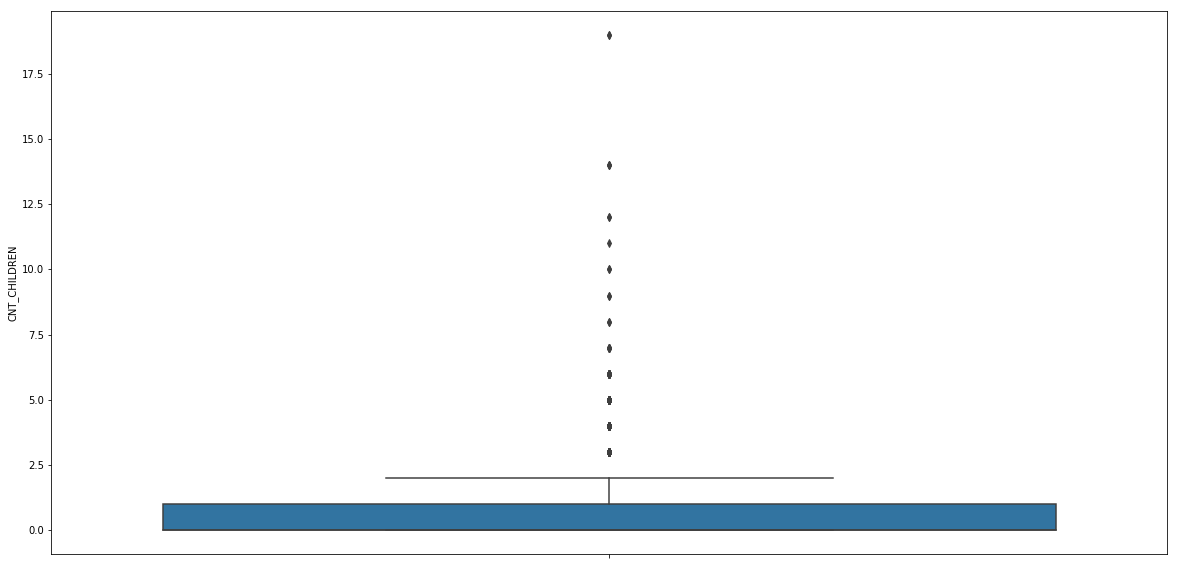

In [22]:
# Boxplot: CNT_CHILDREN
sns.boxplot(y=application_data['CNT_CHILDREN'])
plt.show()

As observed from above graph, there are outliers present. Lets see if we can handle them.

In [23]:
application_data['CNT_CHILDREN'].describe()

count    305548.000000
mean          0.417011
std           0.722154
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [24]:
#here the mean and median is nearly 0. Also the difference between the 25th and 75th quartile is 1. 
#We can replace the outliers with median as it is less likely that a customer can have more than 5 children
medianCNT_CHILDREN = application_data.CNT_CHILDREN.median()

In [25]:
application_data['CNT_CHILDREN'] = np.where(application_data['CNT_CHILDREN'] > 5, medianCNT_CHILDREN, application_data['CNT_CHILDREN'])

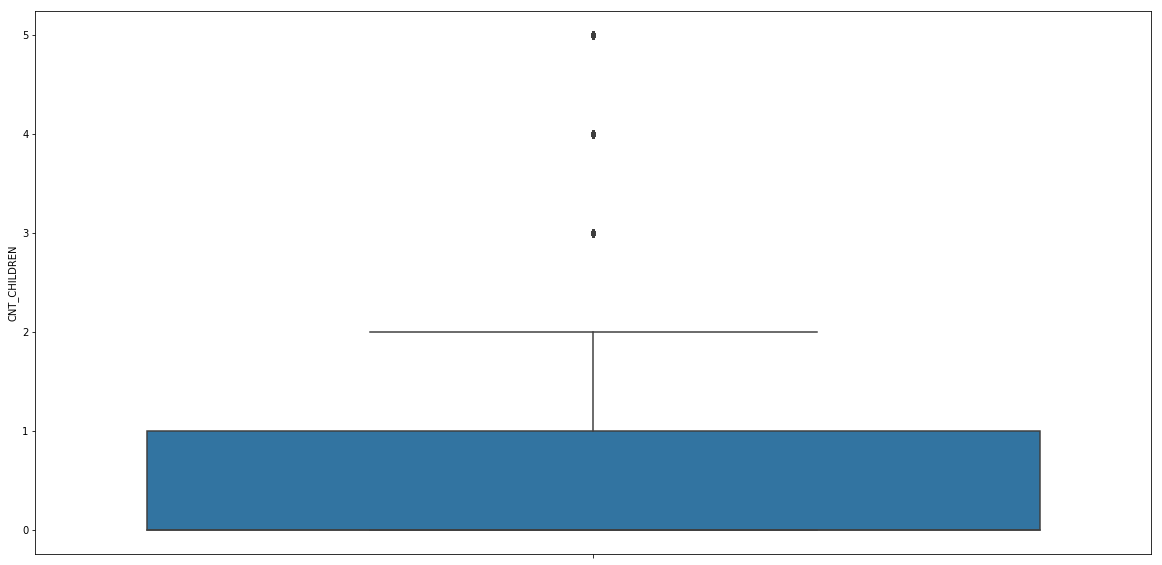

In [26]:
# Boxplot: CNT_CHILDREN
sns.boxplot(y=application_data['CNT_CHILDREN'])
plt.show()

The above graph still consists of outliers, but the range for outliers is quite less compared to the previous graphs.

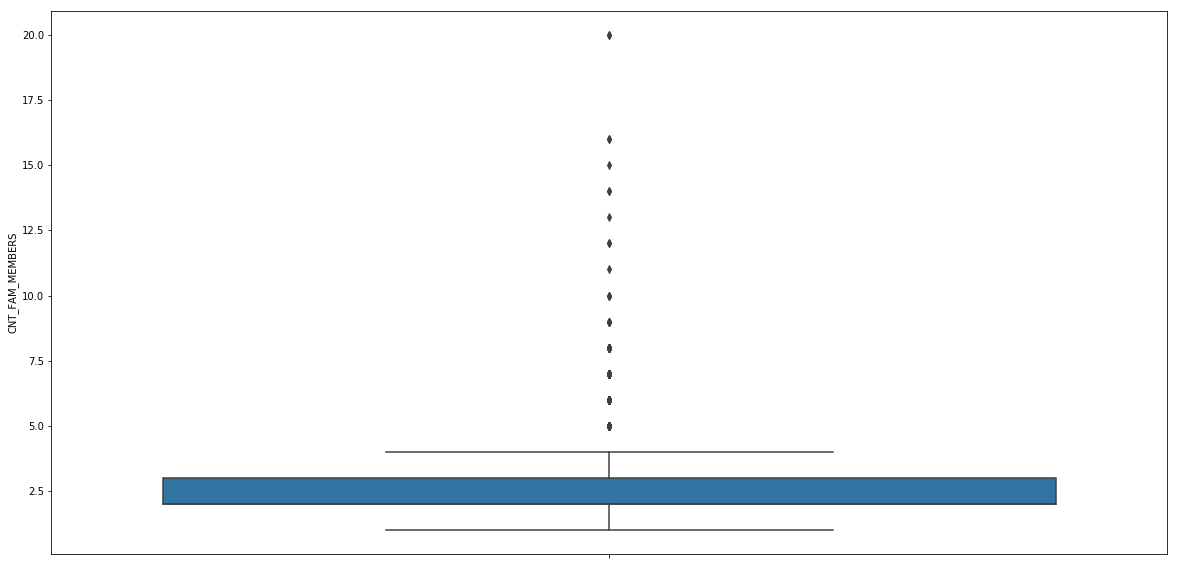

In [27]:
# Boxplot: CNT_FAM_MEMBERS
sns.boxplot(y=application_data['CNT_FAM_MEMBERS'])
plt.show()

As observed from above graph, there are outliers present.

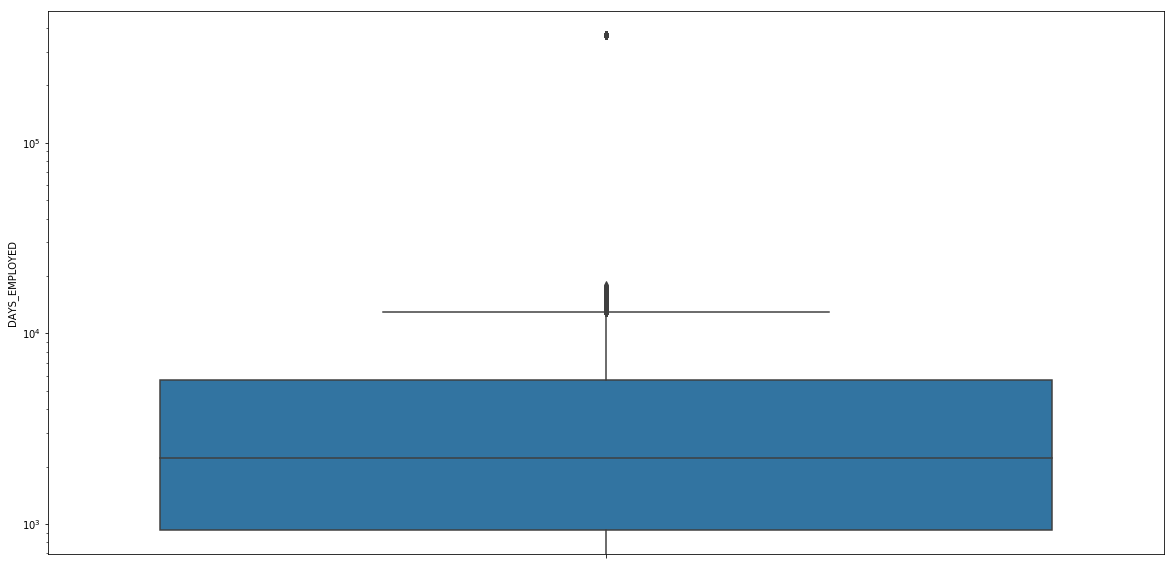

In [28]:
# Boxplot: DAYS_EMPLOYED
sns.boxplot(y=application_data['DAYS_EMPLOYED'])
plt.yscale('log')
plt.show()

As observed from above graph, there are outliers present.

Binning continuous variables i.e. converting continuous variables to categorical by dividing them into intervals.

In [29]:
application_data['AMT_INCOME_TOTAL'].max()

117000000.0

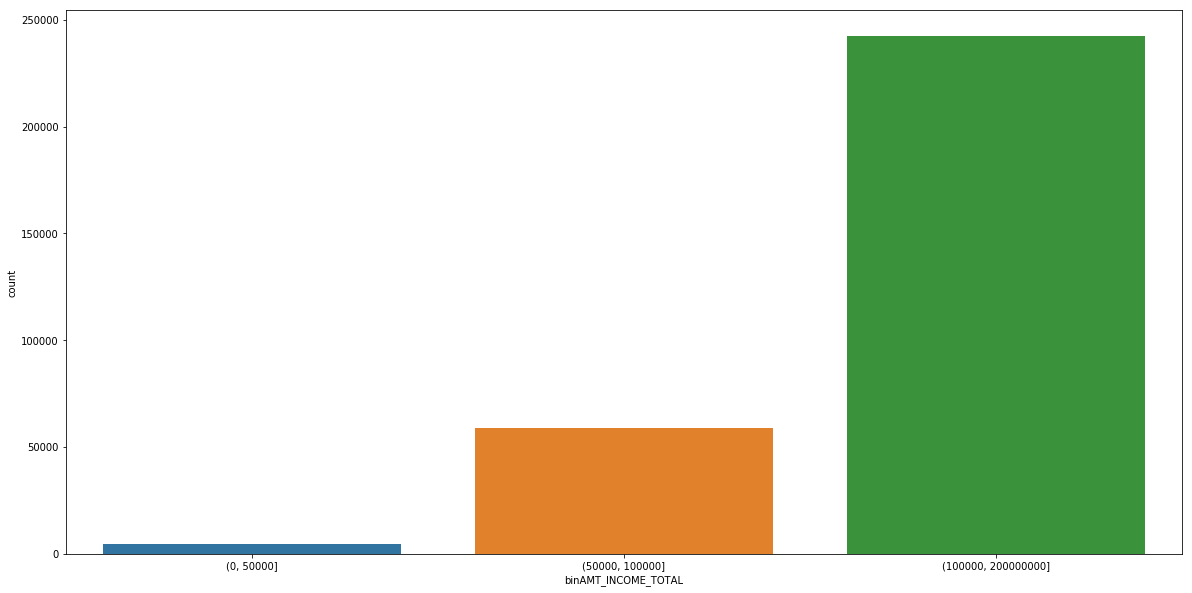

In [30]:
#plot AMT_INCOME_TOTAL
bins = [0, 50000, 100000, 200000000]
application_data['binAMT_INCOME_TOTAL'] = pd.cut(application_data['AMT_INCOME_TOTAL'], bins = bins)
sns.countplot(x="binAMT_INCOME_TOTAL", data=application_data)
plt.show()

As observed, there are more than 200000 customers applying for loan in the income group above 100000. The income of customers is an important factor that decides whether the customer can default in future or not. 

In [31]:
application_data['AMT_CREDIT'].max()

4050000.0

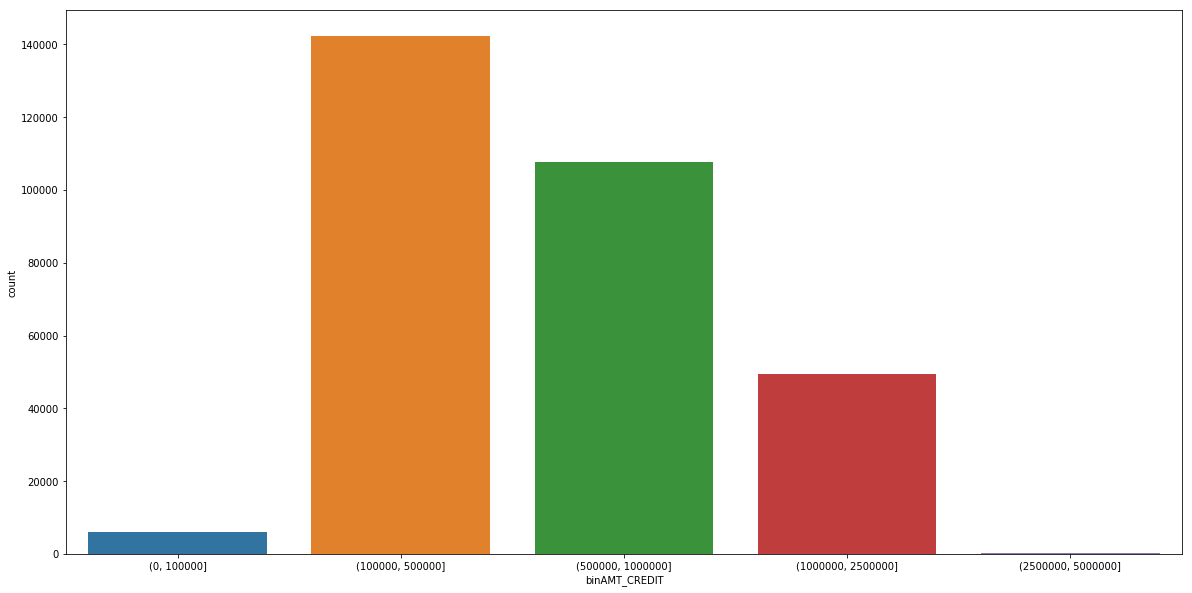

In [32]:
#plot AMT_CREDIT
bins1 = [0, 100000, 500000, 1000000, 2500000, 5000000]
application_data['binAMT_CREDIT'] = pd.cut(application_data['AMT_CREDIT'], bins = bins1)
sns.countplot(x="binAMT_CREDIT", data=application_data)
plt.show()

As observed, more than 120000 customers have applied for loan of credit between 100000 to 500000. A very less number of people have applied for loan below 100000 or more than 2500000.

In [33]:
#Check the Imbalance percentage
100 * len(application_data[(application_data['TARGET'] == 1)])/ len(application_data)

8.084818097320225

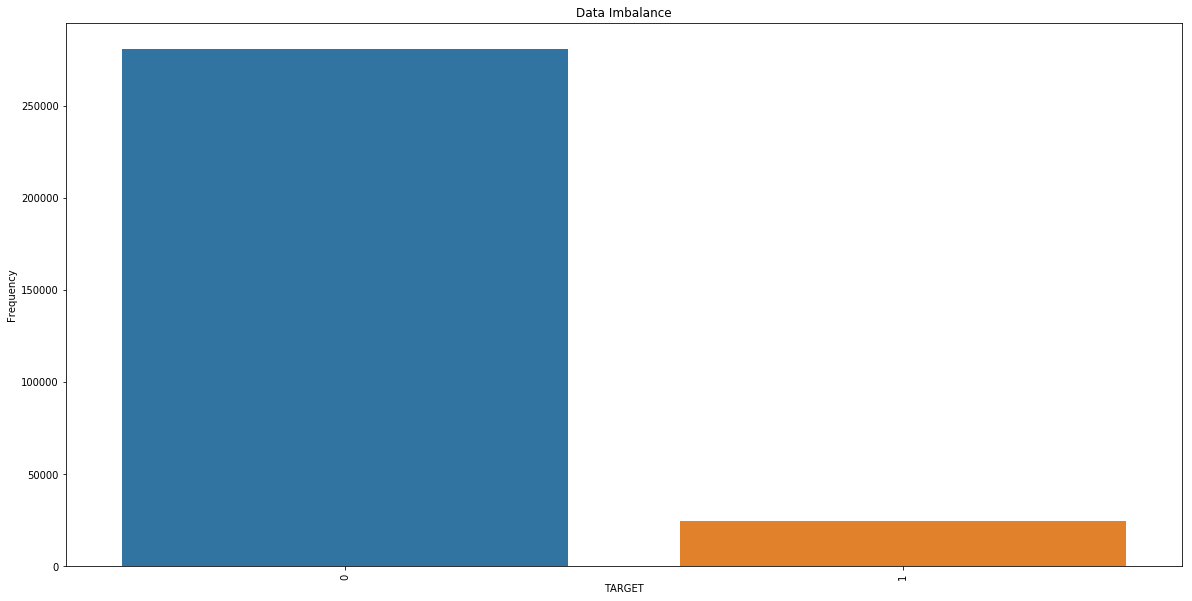

In [34]:
#plot Imbalance
sns.countplot(x='TARGET', data=application_data)
plt.title('Data Imbalance')
plt.ylabel('Frequency')
plt.xlabel('TARGET')
plt.xticks(rotation = 90)
plt.show();

The above graph represents the imbalance in the application data.

In [35]:
#Divide the data into two sets, i.e. Target=1 and Target=0.

#Target=1 
application_data_payment_delayed = application_data[(application_data['TARGET'] == 1)]

#Target=0
application_data_payment_time = application_data[(application_data['TARGET'] == 0)]

Univariate analysis on categorical data

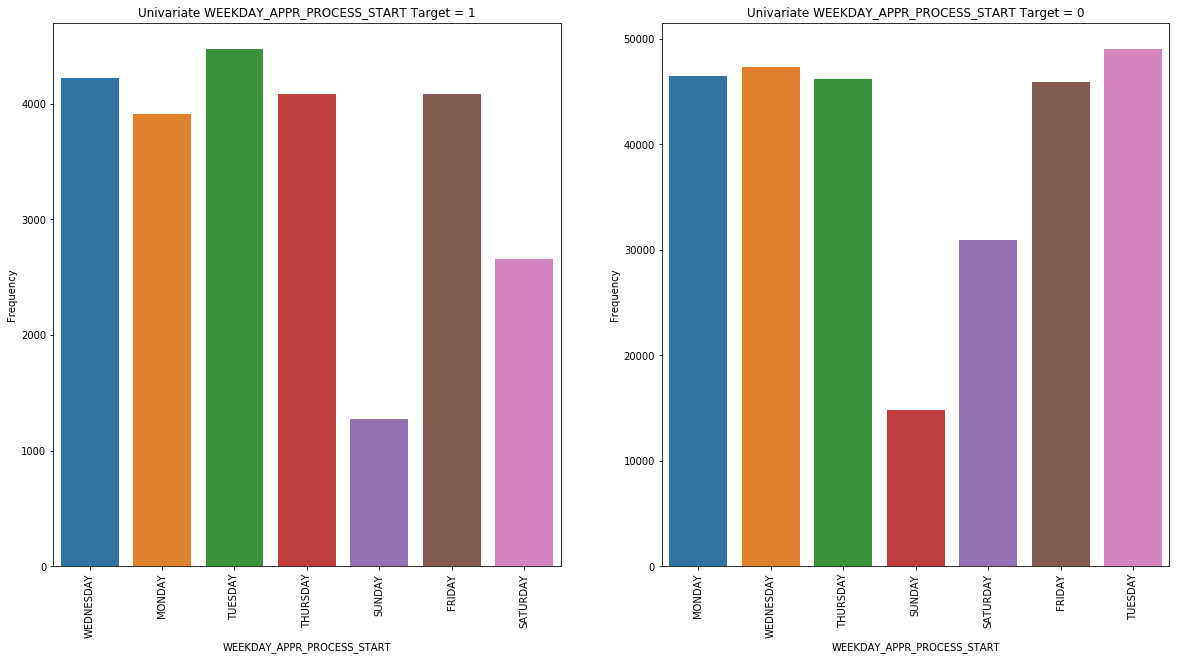

In [36]:
#Univariate analysis: WEEKDAY_APPR_PROCESS_START
plt.subplot(1, 2, 1)
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=application_data_payment_delayed)
plt.title('Univariate WEEKDAY_APPR_PROCESS_START Target = 1')
plt.ylabel('Frequency')
plt.xlabel('WEEKDAY_APPR_PROCESS_START')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=application_data_payment_time)
plt.title('Univariate WEEKDAY_APPR_PROCESS_START Target = 0')
plt.ylabel('Frequency')
plt.xlabel('WEEKDAY_APPR_PROCESS_START')
plt.xticks(rotation = 90)
plt.show();

As observed, the number of loan application on weekends is the lowest for both target = 1 and target = 0 and quite high on weekdays.

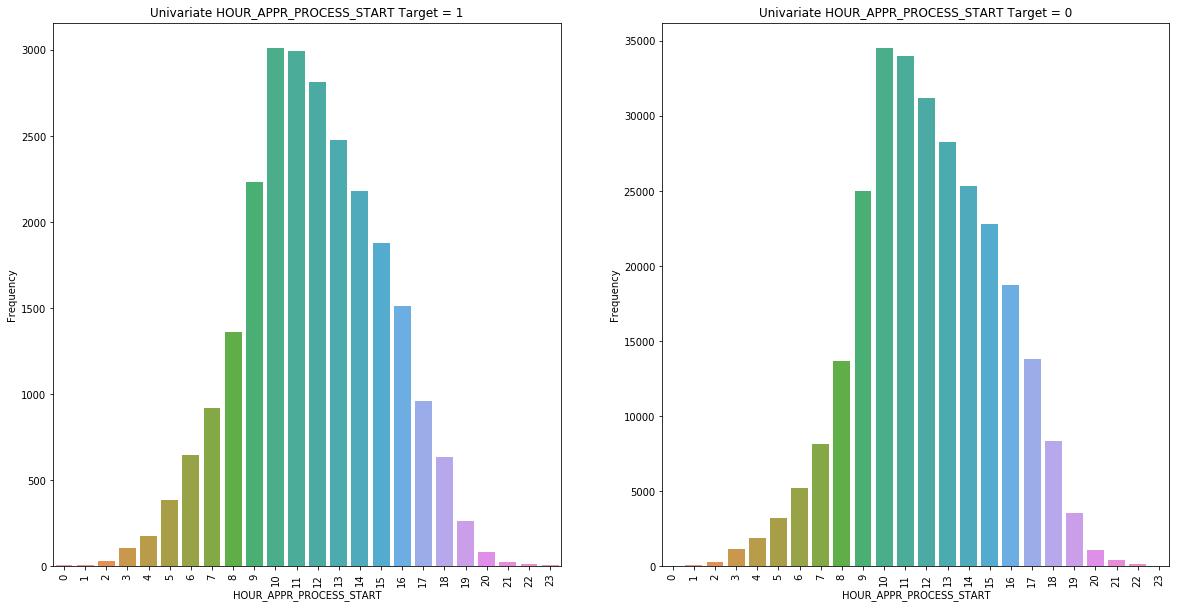

In [37]:
#Univariate analysis: HOUR_APPR_PROCESS_START
plt.subplot(1, 2, 1)
sns.countplot(x='HOUR_APPR_PROCESS_START', data=application_data_payment_delayed)
plt.title('Univariate HOUR_APPR_PROCESS_START Target = 1')
plt.ylabel('Frequency')
plt.xlabel('HOUR_APPR_PROCESS_START')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(x='HOUR_APPR_PROCESS_START', data=application_data_payment_time)
plt.title('Univariate HOUR_APPR_PROCESS_START Target = 0')
plt.ylabel('Frequency')
plt.xlabel('HOUR_APPR_PROCESS_START')
plt.xticks(rotation = 90)
plt.show();

As observed, the number of loan applications between 10th to 12th hour is the highest for both target = 1 and target = 0 and lowest before 5th and 20th hour.

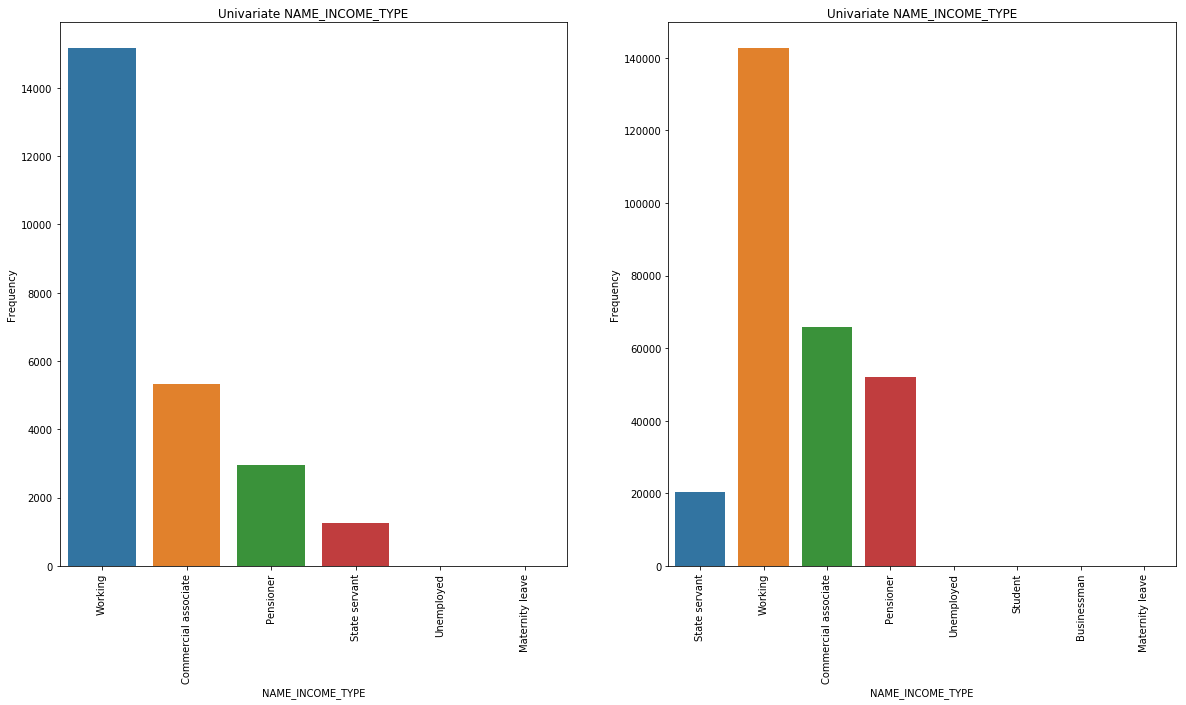

In [38]:
#Univariate analysis: NAME_INCOME_TYPE
plt.subplot(1, 2, 1)
sns.countplot(x='NAME_INCOME_TYPE', data=application_data_payment_delayed)
plt.title('Univariate NAME_INCOME_TYPE')
plt.ylabel('Frequency')
plt.xlabel('NAME_INCOME_TYPE')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(x='NAME_INCOME_TYPE', data=application_data_payment_time)
plt.title('Univariate NAME_INCOME_TYPE')
plt.ylabel('Frequency')
plt.xlabel('NAME_INCOME_TYPE')
plt.xticks(rotation = 90)

plt.show();

As observed, the number of loan applications is the highest for Working income type for both target = 1 and target = 0 and lowest for State servant.

Univariate analysis for continuous variables

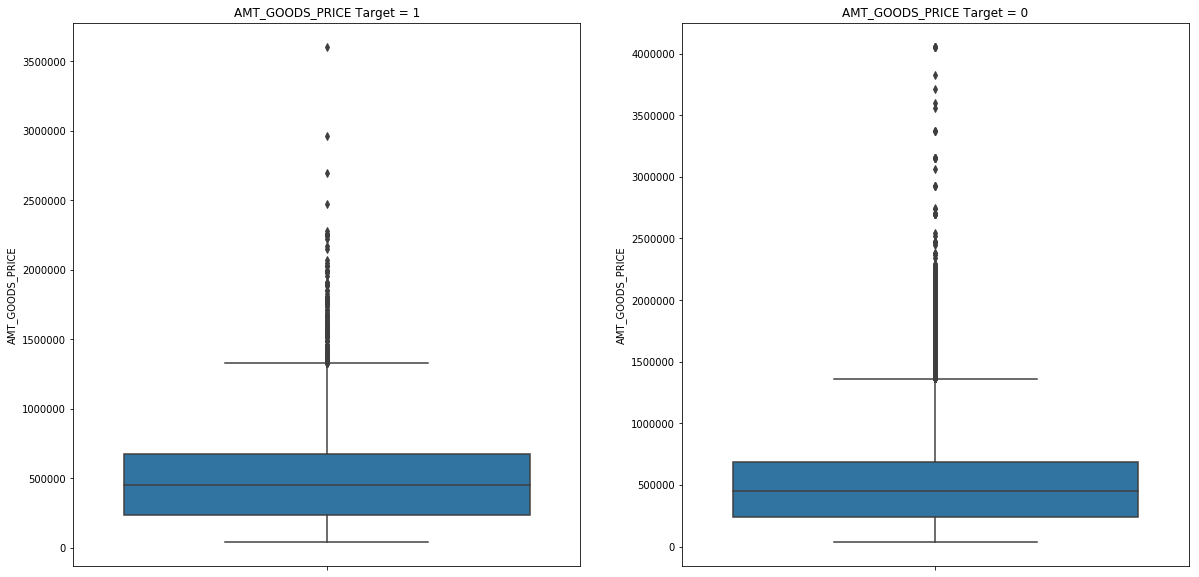

In [39]:
# Univariate analysis: AMT_GOODS_PRICE
plt.subplot(1, 2, 1)
sns.boxplot(y=application_data_payment_delayed['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE Target = 1')

plt.subplot(1, 2, 2)
sns.boxplot(y=application_data_payment_time['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE Target = 0')

plt.show()

As observed, the spread of AMT_GOODS_PRICE is between 0 to 1500000 with the median around 400000.  

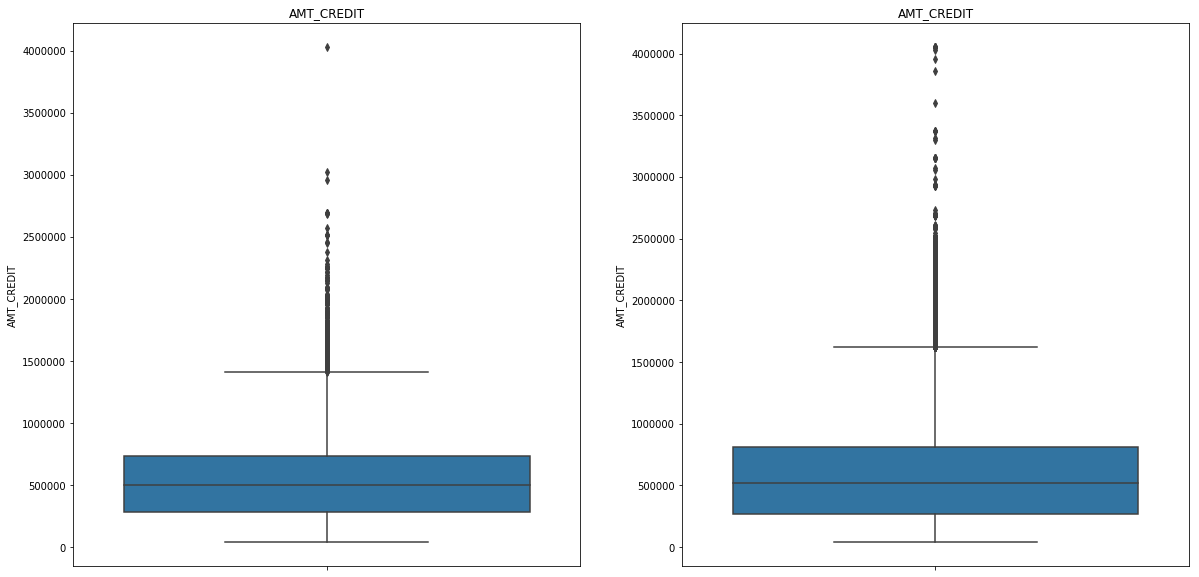

In [40]:
# Univariate analysis: AMT_CREDIT
plt.subplot(1, 2, 1)
sns.boxplot(y=application_data_payment_delayed['AMT_CREDIT'])
plt.title('AMT_CREDIT')

plt.subplot(1, 2, 2)
sns.boxplot(y=application_data_payment_time['AMT_CREDIT'])
plt.title('AMT_CREDIT')

plt.show()

As observed, the spread of AMT_CREDIT is between 0 to 1500000 with the median around 500000. That means, most people have taken a loan for amount between 0 to 1500000.

In [41]:
application_data_payment_delayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24703 entries, 0 to 307509
Data columns (total 41 columns):
SK_ID_CURR                     24703 non-null int64
TARGET                         24703 non-null int64
NAME_CONTRACT_TYPE             24703 non-null object
CODE_GENDER                    24703 non-null object
FLAG_OWN_CAR                   24703 non-null object
FLAG_OWN_REALTY                24703 non-null object
CNT_CHILDREN                   24703 non-null float64
AMT_INCOME_TOTAL               24703 non-null float64
AMT_CREDIT                     24703 non-null float64
AMT_ANNUITY                    24703 non-null float64
AMT_GOODS_PRICE                24703 non-null float64
NAME_TYPE_SUITE                24703 non-null object
NAME_INCOME_TYPE               24703 non-null object
NAME_EDUCATION_TYPE            24703 non-null object
NAME_FAMILY_STATUS             24703 non-null object
NAME_HOUSING_TYPE              24703 non-null object
REGION_POPULATION_RELATIVE     24703 no

Find top 10 correlation

In [42]:
#consider only numeric columns for correlation
numerics = ['int64', 'float64']
curr = application_data_payment_delayed.select_dtypes(include=numerics)
curr1 = application_data_payment_time.select_dtypes(include=numerics)

In [43]:
cor = curr.corr()
round(cor, 2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.00,NaN,-0.00,-0.01,-0.00,-0.01,-0.00,0.01,0.00,-0.01,...,0.00,0.01,0.00,-0.00,0.01,-0.01,-0.01,-0.01,-0.01,-0.00
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.00,NaN,1.00,0.00,-0.00,0.03,-0.01,-0.03,-0.26,-0.19,...,-0.01,0.00,0.05,0.05,-0.01,0.03,0.00,0.03,-0.00,-0.01
AMT_INCOME_TOTAL,-0.01,NaN,0.00,1.00,0.04,0.05,0.04,0.01,-0.00,-0.01,...,0.01,-0.00,-0.00,-0.00,0.01,-0.00,-0.01,-0.00,-0.00,0.00
AMT_CREDIT,-0.00,NaN,-0.00,0.04,1.00,0.75,0.98,0.07,0.14,0.00,...,0.03,-0.03,-0.04,-0.02,0.12,0.02,-0.03,0.02,-0.03,0.11
AMT_ANNUITY,-0.01,NaN,0.03,0.05,0.75,1.00,0.75,0.07,0.01,-0.08,...,0.06,-0.01,0.00,0.01,0.12,0.01,-0.02,0.01,-0.03,0.08
AMT_GOODS_PRICE,-0.00,NaN,-0.01,0.04,0.98,0.75,1.00,0.08,0.14,0.01,...,0.03,-0.03,-0.04,-0.02,0.13,0.02,-0.02,0.02,-0.03,0.12
REGION_POPULATION_RELATIVE,0.01,NaN,-0.03,0.01,0.07,0.07,0.08,1.00,0.05,0.02,...,0.05,-0.06,-0.05,-0.02,0.17,0.01,0.03,0.01,0.02,0.06
DAYS_BIRTH,0.00,NaN,-0.26,-0.00,0.14,0.01,0.14,0.05,1.00,0.58,...,-0.05,-0.16,-0.22,-0.12,0.11,0.01,-0.00,0.01,-0.00,0.11
DAYS_EMPLOYED,-0.01,NaN,-0.19,-0.01,0.00,-0.08,0.01,0.02,0.58,1.00,...,-0.08,-0.09,-0.25,-0.20,0.00,-0.01,0.00,-0.01,0.01,0.00


In [44]:
c1 = cor.unstack()
c2=c1[c1<1.00]
sort1 = c2.sort_values(ascending = True)
sort1
#Top 10 correlation

REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.446951
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.446951
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.443185
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.443185
                             HOUR_APPR_PROCESS_START       -0.294254
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT          -0.294254
                             REGION_RATING_CLIENT_W_CITY   -0.275960
REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START       -0.275960
CNT_CHILDREN                 DAYS_BIRTH                    -0.263332
DAYS_BIRTH                   CNT_CHILDREN                  -0.263332
REGION_RATING_CLIENT         EXT_SOURCE_2                  -0.250451
EXT_SOURCE_2                 REGION_RATING_CLIENT          -0.250451
REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2                  -0.248816
EXT_SOURCE_2                 REGION_RATING_CLIENT_W_CITY   -0.248816
DAYS_EMPLOYED                REG_C

Top 10 correlation:
Positive correlation:
DAYS_EMPLOYED                DAYS_BIRTH                     0.582516
AMT_ANNUITY                  AMT_CREDIT                     0.751740
AMT_GOODS_PRICE              AMT_ANNUITY                    0.752465
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778089
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847498
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.869782
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.872255
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956459
AMT_CREDIT                   AMT_GOODS_PRICE                0.983070
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998287    

In [45]:
cor1 = curr1.corr()
round(cor1, 2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.0,NaN,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,...,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.0,NaN,1.00,0.03,0.00,0.02,-0.00,-0.02,-0.34,-0.25,...,0.02,0.02,0.07,0.07,-0.02,0.01,-0.00,0.01,-0.00,0.01
AMT_INCOME_TOTAL,0.0,NaN,0.03,1.00,0.34,0.42,0.35,0.17,-0.06,-0.14,...,0.13,0.01,0.02,0.02,0.14,-0.03,-0.03,-0.03,-0.03,0.04
AMT_CREDIT,-0.0,NaN,0.00,0.34,1.00,0.77,0.99,0.10,0.05,-0.07,...,0.05,-0.02,-0.02,0.00,0.13,-0.00,-0.02,-0.00,-0.02,0.07
AMT_ANNUITY,0.0,NaN,0.02,0.42,0.77,1.00,0.78,0.12,-0.01,-0.10,...,0.08,-0.01,0.00,0.01,0.13,-0.01,-0.02,-0.01,-0.02,0.06
AMT_GOODS_PRICE,-0.0,NaN,-0.00,0.35,0.99,0.78,1.00,0.10,0.05,-0.07,...,0.05,-0.02,-0.02,0.00,0.14,-0.00,-0.02,-0.00,-0.02,0.07
REGION_POPULATION_RELATIVE,0.0,NaN,-0.02,0.17,0.10,0.12,0.10,1.00,0.03,-0.01,...,0.08,-0.05,-0.04,-0.01,0.20,-0.01,0.01,-0.01,0.00,0.04
DAYS_BIRTH,0.0,NaN,-0.34,-0.06,0.05,-0.01,0.05,0.03,1.00,0.63,...,-0.07,-0.18,-0.24,-0.16,0.08,-0.01,0.00,-0.01,0.00,0.08
DAYS_EMPLOYED,0.0,NaN,-0.25,-0.14,-0.07,-0.10,-0.07,-0.01,0.63,1.00,...,-0.10,-0.09,-0.26,-0.22,-0.03,0.01,0.02,0.01,0.02,-0.02


In [46]:
c3 = cor.unstack()
c4=c3[c3<1.00]
print(c4.sort_values(ascending = True))
#Top 10 correlation

REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.446951
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.446951
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.443185
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.443185
                             HOUR_APPR_PROCESS_START       -0.294254
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT          -0.294254
                             REGION_RATING_CLIENT_W_CITY   -0.275960
REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START       -0.275960
CNT_CHILDREN                 DAYS_BIRTH                    -0.263332
DAYS_BIRTH                   CNT_CHILDREN                  -0.263332
REGION_RATING_CLIENT         EXT_SOURCE_2                  -0.250451
EXT_SOURCE_2                 REGION_RATING_CLIENT          -0.250451
REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2                  -0.248816
EXT_SOURCE_2                 REGION_RATING_CLIENT_W_CITY   -0.248816
DAYS_EMPLOYED                REG_C

Top 10 correlation:
Positive correlation:
DAYS_BIRTH                   DAYS_EMPLOYED                  0.582516
AMT_CREDIT                   AMT_ANNUITY                    0.751740
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752465
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778089
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847498
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.869782
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.872255
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956459
AMT_GOODS_PRICE              AMT_CREDIT                     0.983070
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998287

The top 10 correlation are almost same for both Target = 1 and Target = 0 

Bivariate analysis on categorical variables

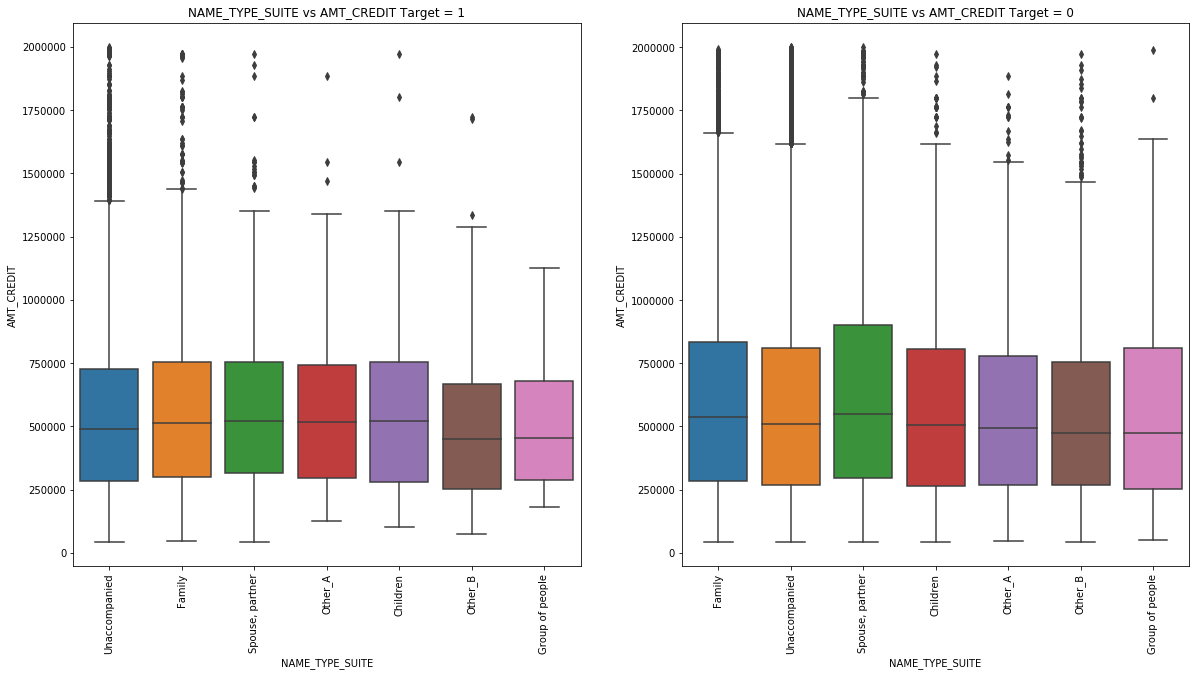

In [47]:
# remove points having extreme values
application_data_payment_delayedtemp = application_data_payment_delayed[(application_data_payment_delayed.AMT_CREDIT < 2000000)]
application_data_payment_timetemp = application_data_payment_time[(application_data_payment_time.AMT_CREDIT < 2000000)]

#Bivariate analysis: NAME_TYPE_SUITE vs AMT_CREDIT
plt.subplot(1, 2, 1)
sns.boxplot(x='NAME_TYPE_SUITE', y='AMT_CREDIT', data=application_data_payment_delayedtemp)
#plt.yscale('log')
plt.title('NAME_TYPE_SUITE vs AMT_CREDIT Target = 1')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.boxplot(x='NAME_TYPE_SUITE', y='AMT_CREDIT', data=application_data_payment_timetemp)
#plt.yscale('log')
plt.title('NAME_TYPE_SUITE vs AMT_CREDIT Target = 0')
plt.xticks(rotation = 90)

plt.show()

As observed, the distribution is quite similar in both the cases

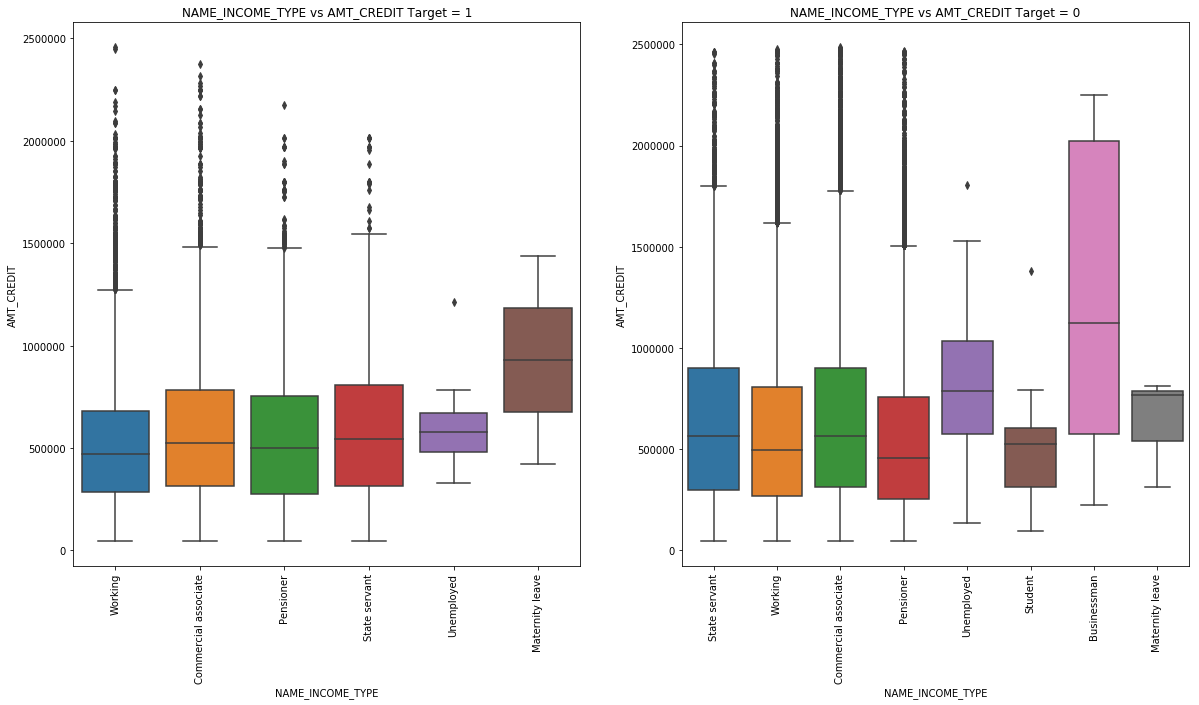

In [48]:
# remove points having extreme values
application_data_payment_delayedtemp = application_data_payment_delayed[(application_data_payment_delayed.AMT_CREDIT < 2500000)]
application_data_payment_timetemp = application_data_payment_time[(application_data_payment_time.AMT_CREDIT < 2500000)]
#Bivariate analysis: NAME_INCOME_TYPE vs AMT_CREDIT
plt.subplot(1, 2, 1)
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=application_data_payment_delayedtemp)
#plt.yscale('log')
plt.title('NAME_INCOME_TYPE vs AMT_CREDIT Target = 1')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=application_data_payment_timetemp)
#plt.yscale('log')
plt.title('NAME_INCOME_TYPE vs AMT_CREDIT Target = 0')
plt.xticks(rotation = 90)

plt.show()

As observed, the distribution is bit different in both the cases. People who are bussinessmen tend to take huge amount of loan and also pay it on time. People who are unemployed take less amount of loan. The spread for credit amount is approximately 0 to 1500000 for both Target = 1 and Target = 0 for all other cases except for bussinessmen in Target = 0 where the spread is from 0 to 2500000.

Bivariate analysis on continuous variables

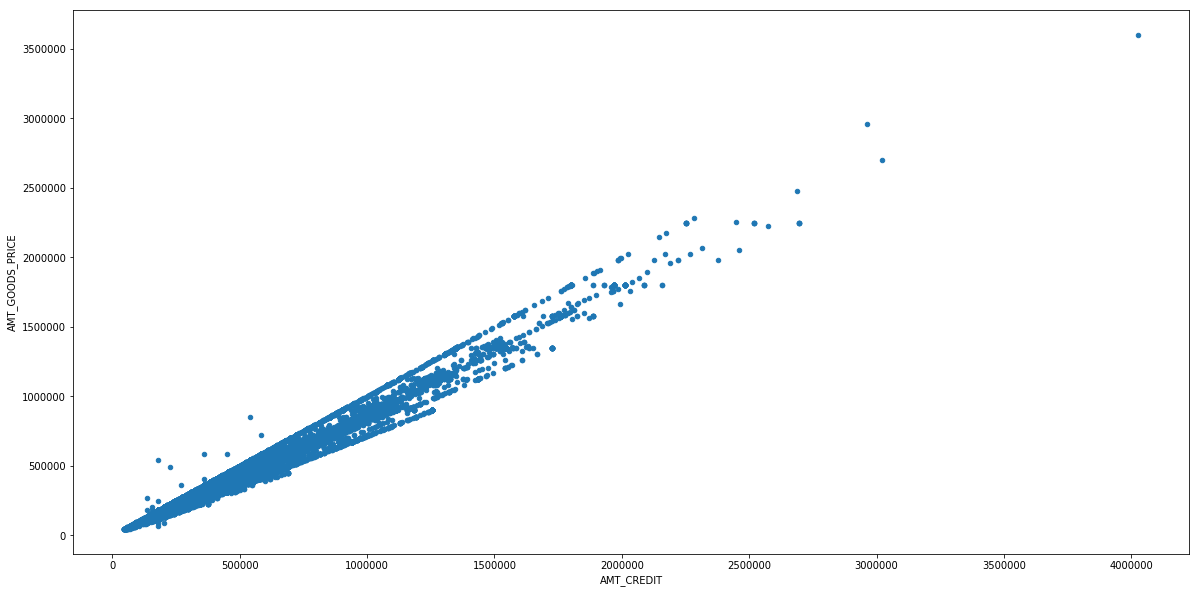

In [49]:
#Bivariate analysis: AMT_CREDIT vs AMT_GOODS_PRICE Target = 1
application_data_payment_delayed.plot.scatter(x='AMT_CREDIT',y='AMT_GOODS_PRICE')

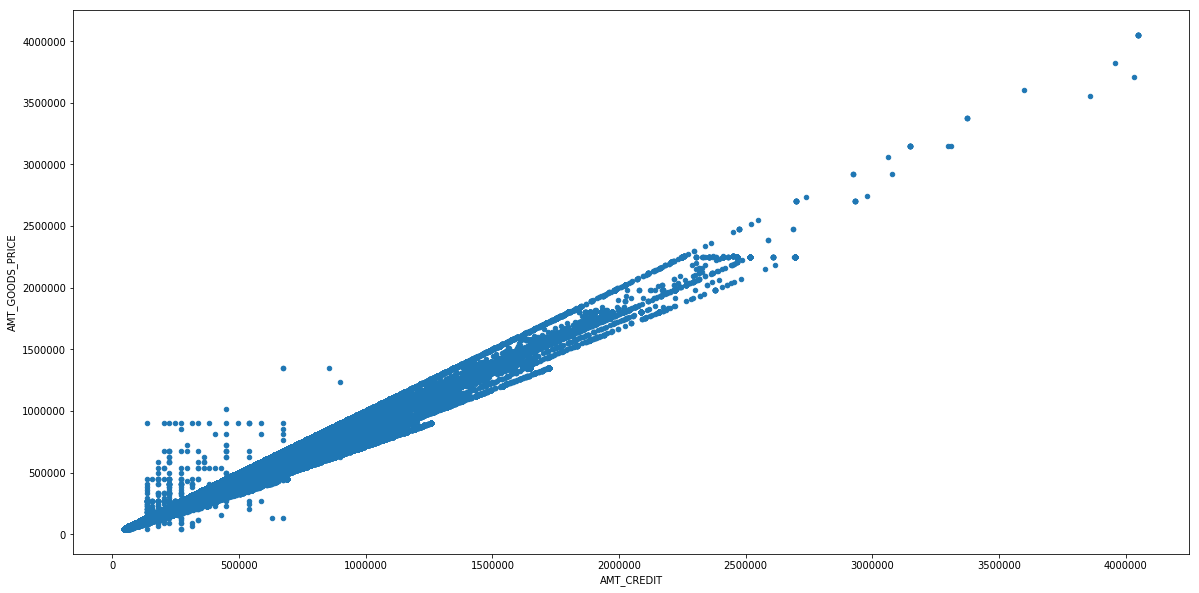

In [50]:
#Bivariate analysis: AMT_CREDIT vs AMT_GOODS_PRICE Target = 0
application_data_payment_time.plot.scatter(x='AMT_CREDIT',y='AMT_GOODS_PRICE')

AMT_CREDIT and AMT_GOODS_PRICE are highly correlated for both Target = 1 and Target = 0 as observed from the graph

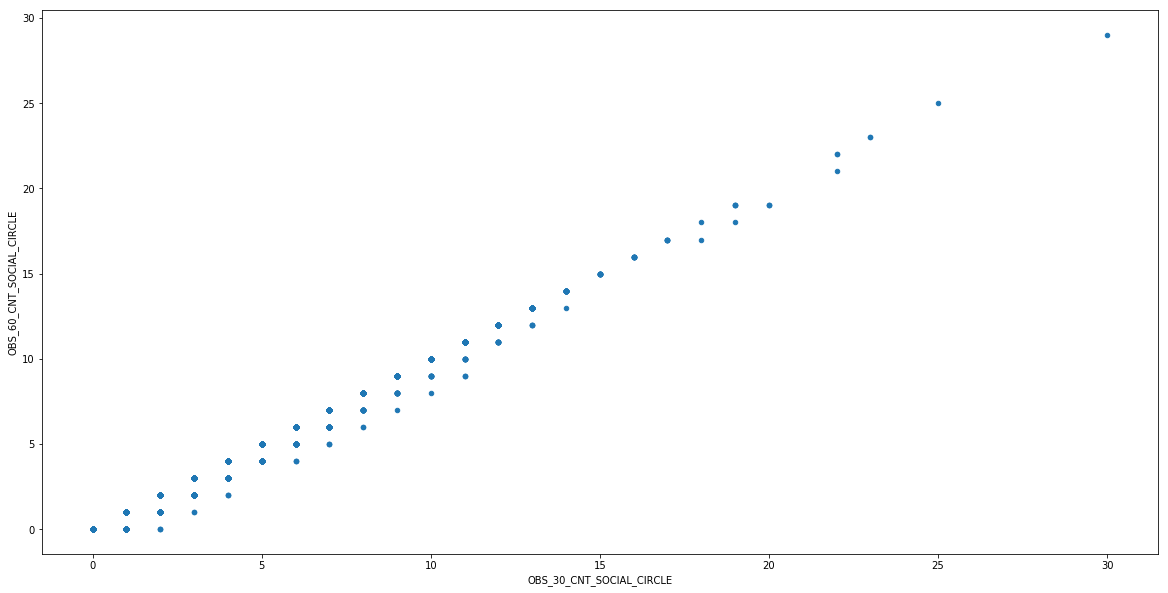

In [51]:
#Bivariate analysis: OBS_30_CNT_SOCIAL_CIRCLE vs OBS_60_CNT_SOCIAL_CIRCLE Target = 1
application_data_payment_delayed.plot.scatter(x='OBS_30_CNT_SOCIAL_CIRCLE',y='OBS_60_CNT_SOCIAL_CIRCLE')

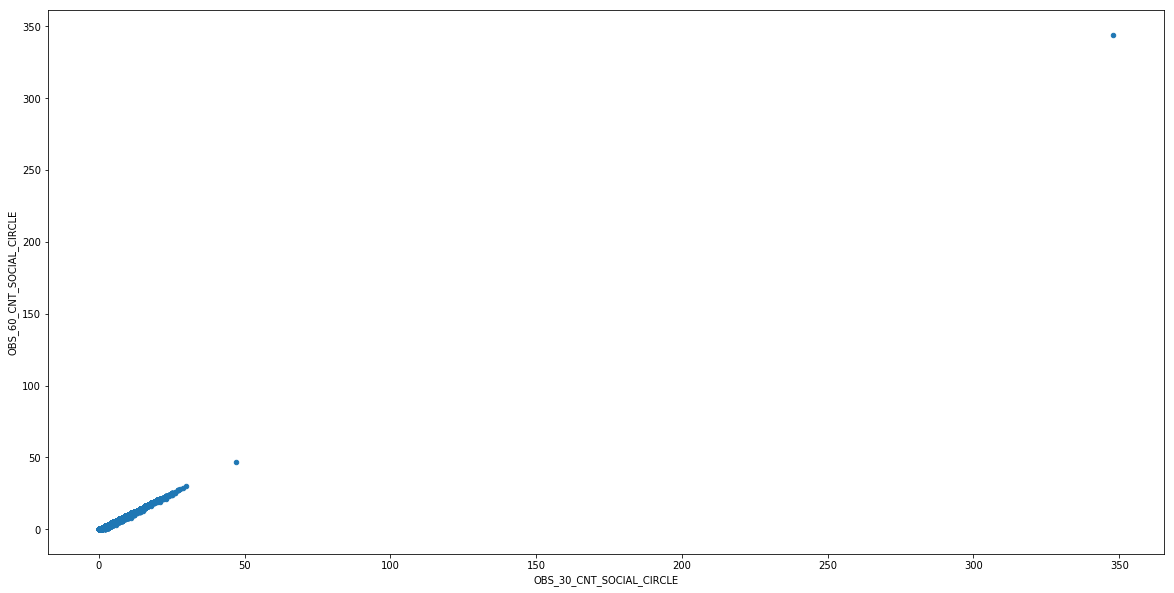

In [52]:
#Bivariate analysis: OBS_30_CNT_SOCIAL_CIRCLE vs OBS_60_CNT_SOCIAL_CIRCLE Target = 0
application_data_payment_time.plot.scatter(x='OBS_30_CNT_SOCIAL_CIRCLE',y='OBS_60_CNT_SOCIAL_CIRCLE')

In [53]:
# remove points having extreme values
application_data_payment_time = application_data_payment_time[(application_data_payment_time.OBS_30_CNT_SOCIAL_CIRCLE < 50)
                                                              & (application_data_payment_time.OBS_60_CNT_SOCIAL_CIRCLE < 50)]

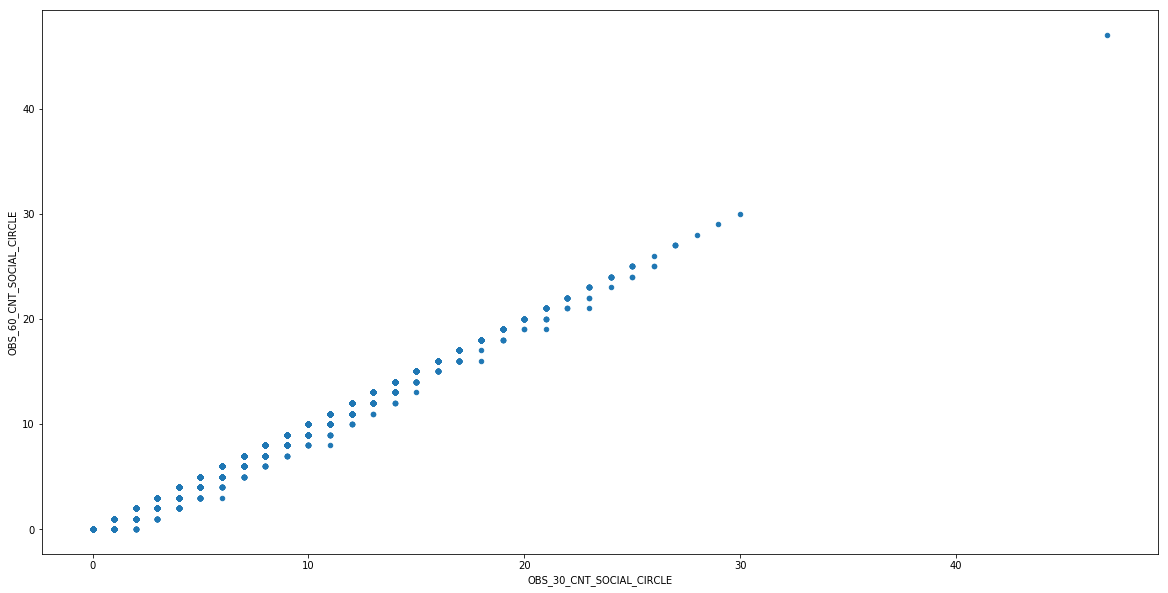

In [54]:
#Bivariate analysis: OBS_30_CNT_SOCIAL_CIRCLE vs OBS_60_CNT_SOCIAL_CIRCLE Target = 0
application_data_payment_time.plot.scatter(x='OBS_30_CNT_SOCIAL_CIRCLE',y='OBS_60_CNT_SOCIAL_CIRCLE')

OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are highly correlated for both Target = 1 and Target = 0 as observed from the graph

Previous Application analysis

In [55]:
#Import Dataset previous_application.csv
previous_application = pd.read_csv(r"D:\NC\Trail_DS\EDA Case Study\previous_application.csv")
previous_application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#count the nuber of null values in each column
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [57]:
#percentage of null values in each column
colwise_per_missingvalues = 100 * previous_application.isnull().sum()/len(previous_application)
colwise_per_missingvalues

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [58]:
#list all columns with more than 20 percent missing values
colstodrop = colwise_per_missingvalues[colwise_per_missingvalues > 20.0]
colstodroplist = colstodrop.index
colstodroplist 

Index(['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [59]:
#drop all columns with greater than 20 percent missing values
previous_application = previous_application.drop(colstodroplist, axis = 1)
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [60]:
colwise_per_missingvalues1 = 100 * previous_application.isnull().sum()/len(previous_application)
colwise_per_missingvalues1

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.020716
dtype: float64

In [61]:
#count the nuber of null values in each column
previous_application.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [62]:
# calculate the percentage of missing rows
100*(len(previous_application[previous_application.isnull().sum(axis=1) > 0].index) / len(previous_application.index))

0.0207757808280855

In [63]:
#Since percentage of rows with missing values is less than 1 percent, we drop them all
# retaining the rows having <= 0 NaNs
previous_application = previous_application[previous_application.isnull().sum(axis=1) <= 0]
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 23 columns):
SK_ID_PREV                     1669867 non-null int64
SK_ID_CURR                     1669867 non-null int64
NAME_CONTRACT_TYPE             1669867 non-null object
AMT_APPLICATION                1669867 non-null float64
AMT_CREDIT                     1669867 non-null float64
WEEKDAY_APPR_PROCESS_START     1669867 non-null object
HOUR_APPR_PROCESS_START        1669867 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1669867 non-null object
NFLAG_LAST_APPL_IN_DAY         1669867 non-null int64
NAME_CASH_LOAN_PURPOSE         1669867 non-null object
NAME_CONTRACT_STATUS           1669867 non-null object
DAYS_DECISION                  1669867 non-null int64
NAME_PAYMENT_TYPE              1669867 non-null object
CODE_REJECT_REASON             1669867 non-null object
NAME_CLIENT_TYPE               1669867 non-null object
NAME_GOODS_CATEGORY            1669867 non-null object
NAME_PORTF

In [64]:
print(len(previous_application))

1669867


In [65]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 23 columns):
SK_ID_PREV                     1669867 non-null int64
SK_ID_CURR                     1669867 non-null int64
NAME_CONTRACT_TYPE             1669867 non-null object
AMT_APPLICATION                1669867 non-null float64
AMT_CREDIT                     1669867 non-null float64
WEEKDAY_APPR_PROCESS_START     1669867 non-null object
HOUR_APPR_PROCESS_START        1669867 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1669867 non-null object
NFLAG_LAST_APPL_IN_DAY         1669867 non-null int64
NAME_CASH_LOAN_PURPOSE         1669867 non-null object
NAME_CONTRACT_STATUS           1669867 non-null object
DAYS_DECISION                  1669867 non-null int64
NAME_PAYMENT_TYPE              1669867 non-null object
CODE_REJECT_REASON             1669867 non-null object
NAME_CLIENT_TYPE               1669867 non-null object
NAME_GOODS_CATEGORY            1669867 non-null object
NAME_PORTF

In [66]:
#convert DAYS_DECISION to positive
previous_application['DAYS_DECISION'] = previous_application['DAYS_DECISION'].abs()

In [67]:
#drop if there are duplicate rows retaining the 1st row
previous_application.drop_duplicates(keep='first', inplace=True) 

Univariate analysis on categorical data

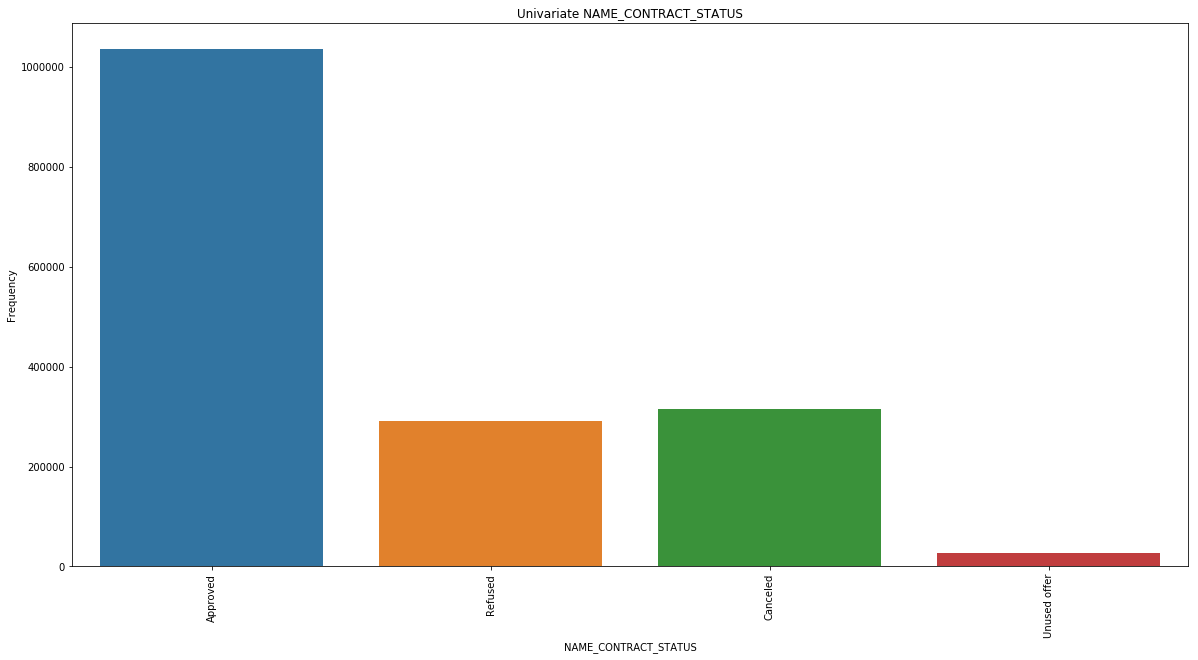

In [68]:
#Univariate analysis: NAME_CONTRACT_STATUS
sns.countplot(x='NAME_CONTRACT_STATUS', data=previous_application)
plt.title('Univariate NAME_CONTRACT_STATUS')
plt.ylabel('Frequency')
plt.xlabel('NAME_CONTRACT_STATUS')
plt.xticks(rotation = 90)
plt.show();

As observed from the graph, the number of loans approved is more around 1000000 and the number of unused offer is lowest. There are around 200000 to 300000 loan applications which have been refused or canceled.

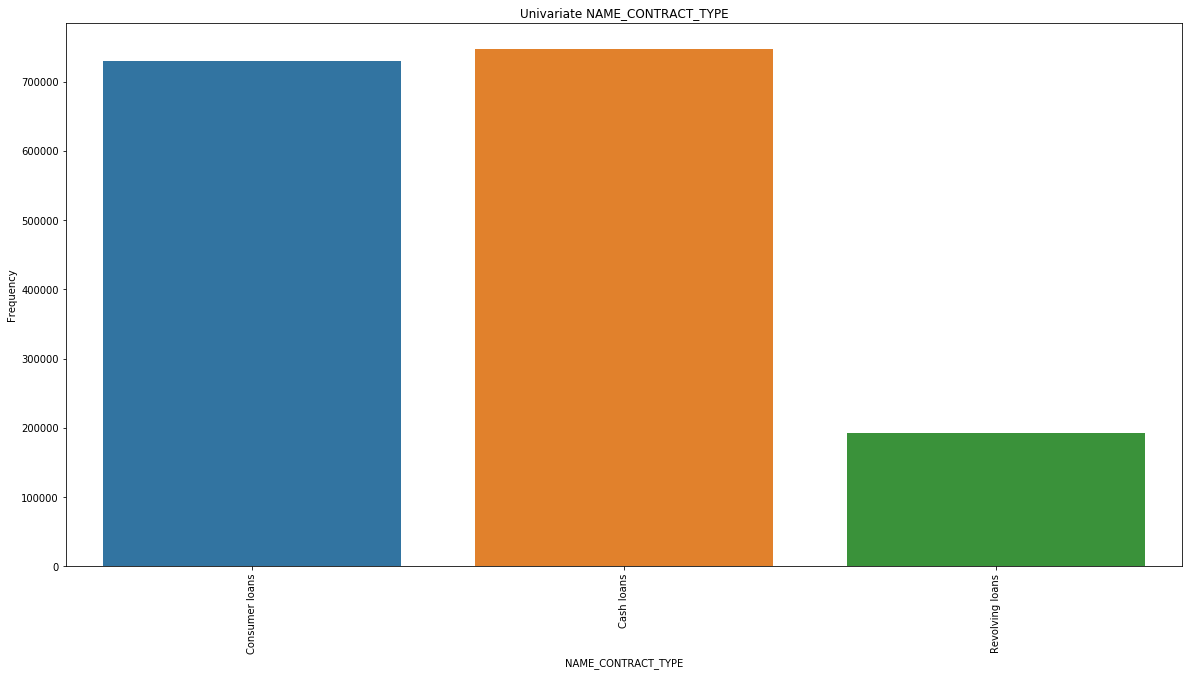

In [69]:
#Univariate analysis: NAME_CONTRACT_TYPE
sns.countplot(x='NAME_CONTRACT_TYPE', data=previous_application)
plt.title('Univariate NAME_CONTRACT_TYPE')
plt.ylabel('Frequency')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.xticks(rotation = 90)
plt.show();

As observed from the graph the number of Consumer loans and cash loans is more around 700000 whereas the number of applications for revolving loans is considerably low.

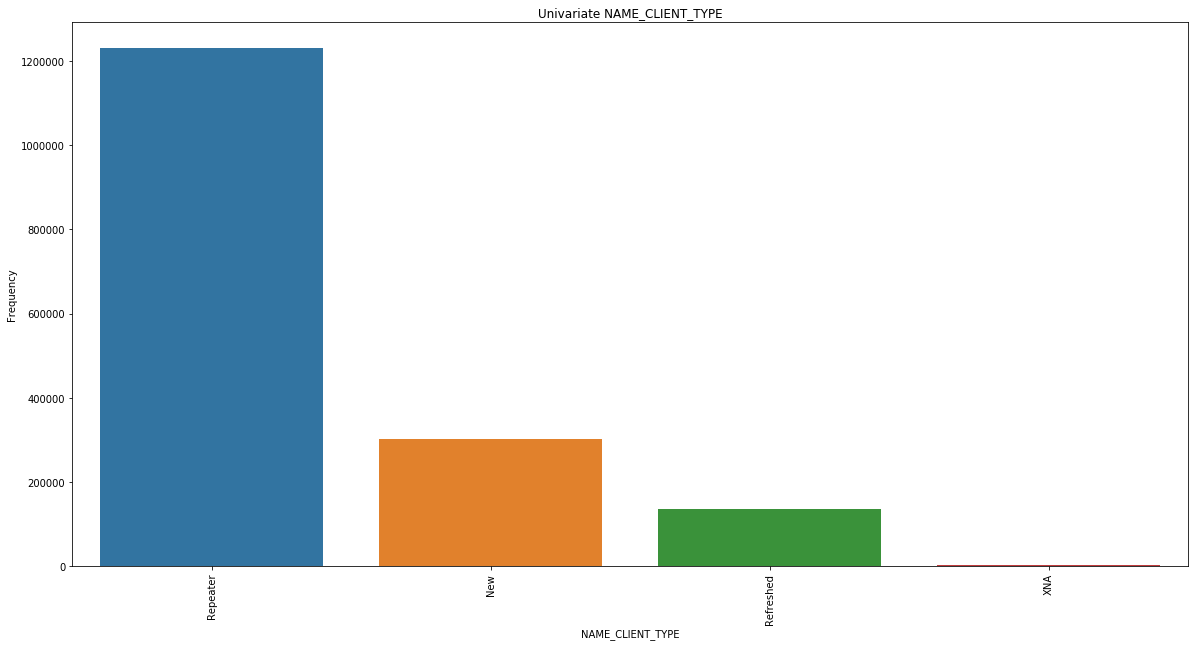

In [70]:
#Univariate analysis: NAME_CLIENT_TYPE
sns.countplot(x='NAME_CLIENT_TYPE', data=previous_application)
plt.title('Univariate NAME_CLIENT_TYPE')
plt.ylabel('Frequency')
plt.xlabel('NAME_CLIENT_TYPE')
plt.xticks(rotation = 90)
plt.show();

As observed from the graph there are more than 1200000 applicants who are repeater and there are some who are new and refreshed. This means people who take up loan once, may apply again for loans in future.

Univariate analysis for continuous variables

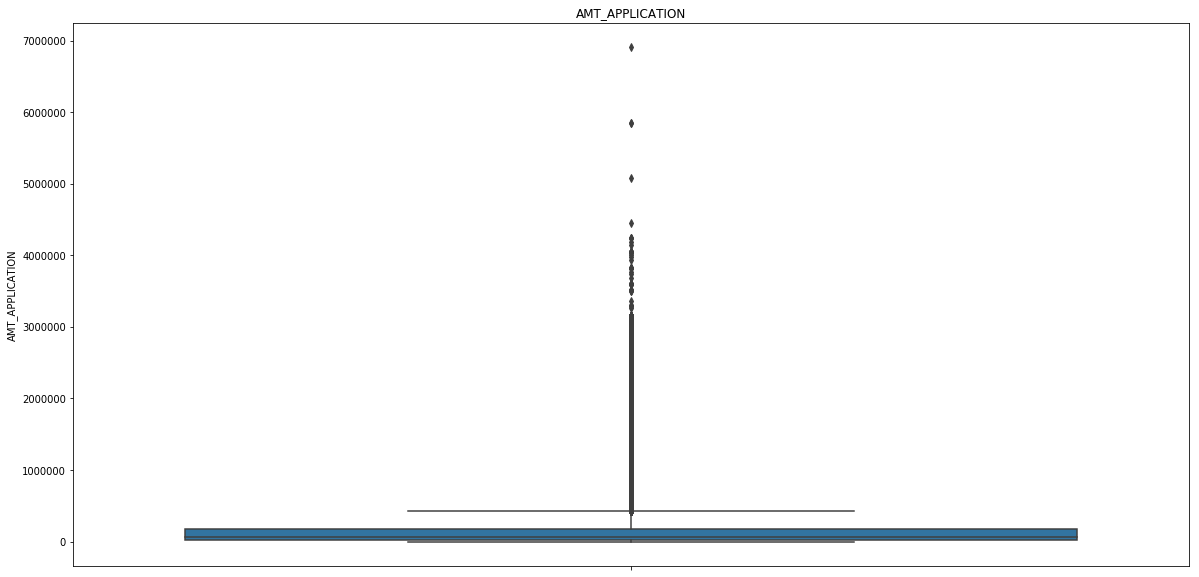

In [71]:
# Univariate analysis: AMT_APPLICATION
sns.boxplot(y=previous_application['AMT_APPLICATION'])
plt.title('AMT_APPLICATION')
#plt.yscale('log')
plt.show()

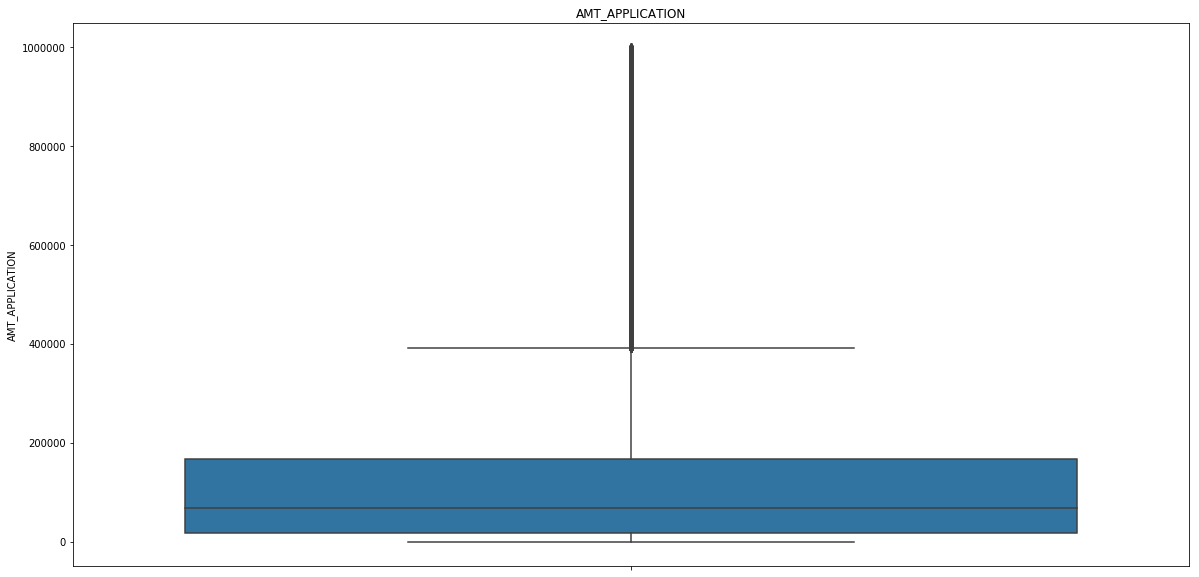

In [72]:
# remove points having extreme values
previous_applicationtemp = previous_application[(previous_application.AMT_APPLICATION < 1000000)]
# Univariate analysis: AMT_APPLICATION
sns.boxplot(y=previous_applicationtemp['AMT_APPLICATION'])
plt.title('AMT_APPLICATION')
#plt.yscale('log')
plt.show()

As observed, people have mostly applied for loan amount ranging from 0 to 400000.

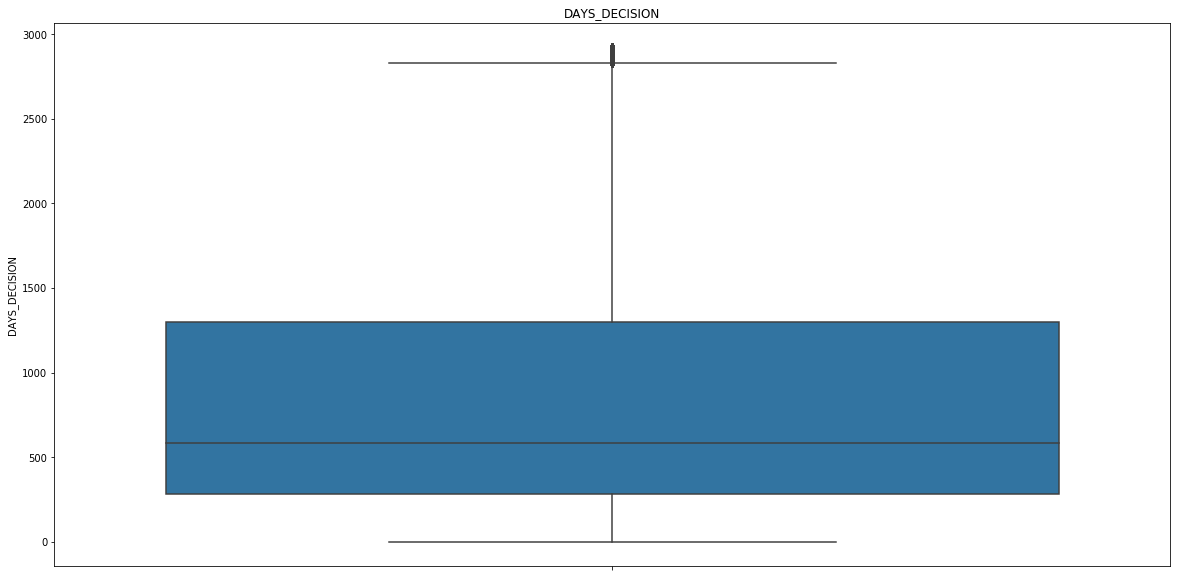

In [73]:
# Univariate analysis: DAYS_DECISION
sns.boxplot(y=previous_application['DAYS_DECISION'])
plt.title('DAYS_DECISION')
plt.show()

As observed, the bank has taken 0 to 3000 days to decide whether to grant the loan or not.

Bivariate analysis on categorical variables

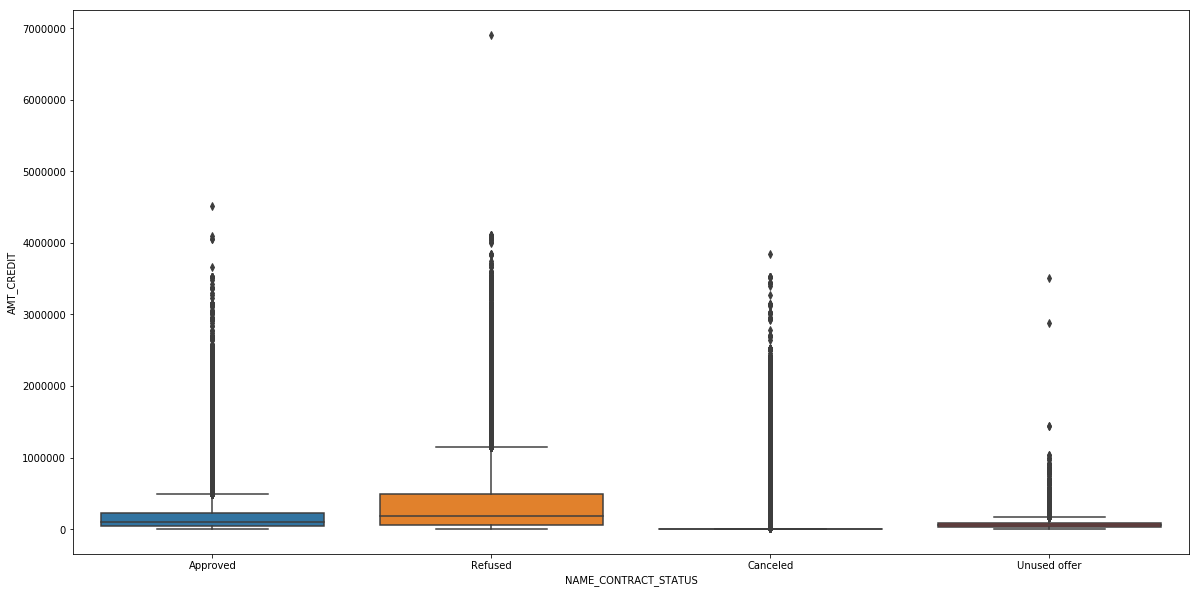

In [74]:
#Bivariate analysis: NAME_CONTRACT_STATUS vs AMT_CREDIT
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', data=previous_application)
#plt.yscale('log')
plt.show()

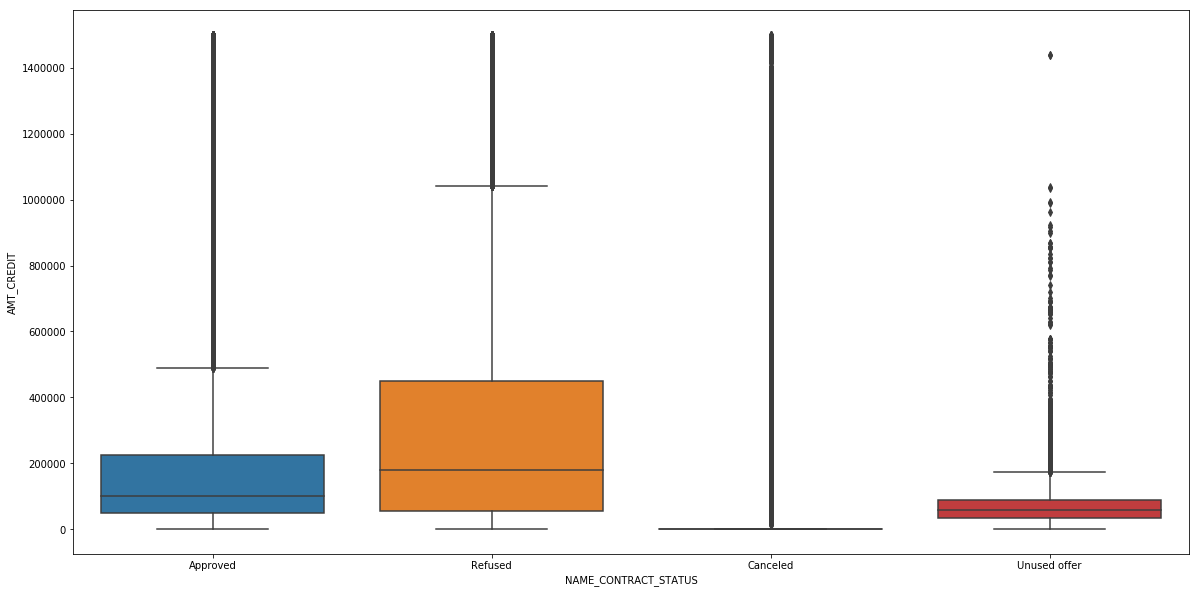

In [75]:
# remove points having extreme values
previous_applicationtemp = previous_application[(previous_application.AMT_CREDIT < 1500000)]

#Bivariate analysis: NAME_CONTRACT_STATUS vs AMT_CREDIT
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', data=previous_applicationtemp)
#plt.yscale('log')
plt.show()

AS observed, people with lower credit amount have been approved loan, people with high credit amount have a chance of loan being refused.

Bivariate analysis on continuous variables

In [76]:
#consider only numeric columns for correlation
numerics = ['int64', 'float64']
currprevious = previous_application.select_dtypes(include=numerics)
corprevious = currprevious.corr()

In [77]:
c1previous = corprevious.unstack()
c2previous=c1previous[c1previous<1.00]
print(c2previous.sort_values(ascending = True))
#Top 10 correlation

AMT_CREDIT               DAYS_DECISION             -0.133850
DAYS_DECISION            AMT_CREDIT                -0.133850
AMT_APPLICATION          DAYS_DECISION             -0.133745
DAYS_DECISION            AMT_APPLICATION           -0.133745
NFLAG_LAST_APPL_IN_DAY   AMT_CREDIT                -0.025172
AMT_CREDIT               NFLAG_LAST_APPL_IN_DAY    -0.025172
                         HOUR_APPR_PROCESS_START   -0.021030
HOUR_APPR_PROCESS_START  AMT_CREDIT                -0.021030
DAYS_DECISION            SK_ID_PREV                -0.019102
SK_ID_PREV               DAYS_DECISION             -0.019102
NFLAG_LAST_APPL_IN_DAY   DAYS_DECISION             -0.016548
DAYS_DECISION            NFLAG_LAST_APPL_IN_DAY    -0.016548
HOUR_APPR_PROCESS_START  AMT_APPLICATION           -0.014407
AMT_APPLICATION          HOUR_APPR_PROCESS_START   -0.014407
SELLERPLACE_AREA         AMT_CREDIT                -0.009573
AMT_CREDIT               SELLERPLACE_AREA          -0.009573
SELLERPLACE_AREA        

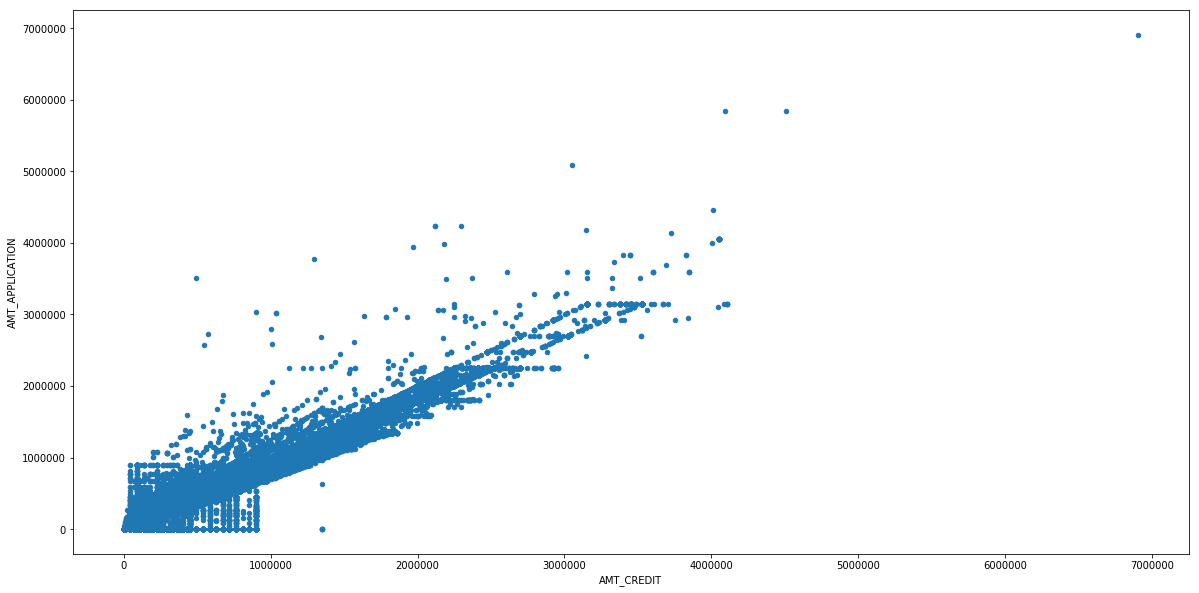

In [78]:
#Bivariate analysis: AMT_CREDIT vs AMT_APPLICATION
previous_application.plot.scatter(x='AMT_CREDIT',y='AMT_APPLICATION')

As observed, the graph is straight line. This implies that AMT_CREDIT and AMT_APPLICATION are highly correlated.

Merge dataset and analyse

In [79]:
#Merge dataset
customer_data = pd.merge(application_data, previous_application, on='SK_ID_CURR', how='inner')
customer_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest
5,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
6,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,Card Street
7,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,XAP,Repeater,Audio/Video,POS,XNA,Country-wide,8025,Consumer electronics,high,POS household with interest
8,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,XNA,Card X-Sell
9,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high


In [80]:
#drop if there are duplicate rows retaining the 1st row
customer_data.drop_duplicates(keep='first', inplace=True) 

In [81]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407954 entries, 0 to 1407953
Data columns (total 63 columns):
SK_ID_CURR                      1407954 non-null int64
TARGET                          1407954 non-null int64
NAME_CONTRACT_TYPE_x            1407954 non-null object
CODE_GENDER                     1407954 non-null object
FLAG_OWN_CAR                    1407954 non-null object
FLAG_OWN_REALTY                 1407954 non-null object
CNT_CHILDREN                    1407954 non-null float64
AMT_INCOME_TOTAL                1407954 non-null float64
AMT_CREDIT_x                    1407954 non-null float64
AMT_ANNUITY                     1407954 non-null float64
AMT_GOODS_PRICE                 1407954 non-null float64
NAME_TYPE_SUITE                 1407954 non-null object
NAME_INCOME_TYPE                1407954 non-null object
NAME_EDUCATION_TYPE             1407954 non-null object
NAME_FAMILY_STATUS              1407954 non-null object
NAME_HOUSING_TYPE               1407954 non-

Univariate analysis on categorical variables

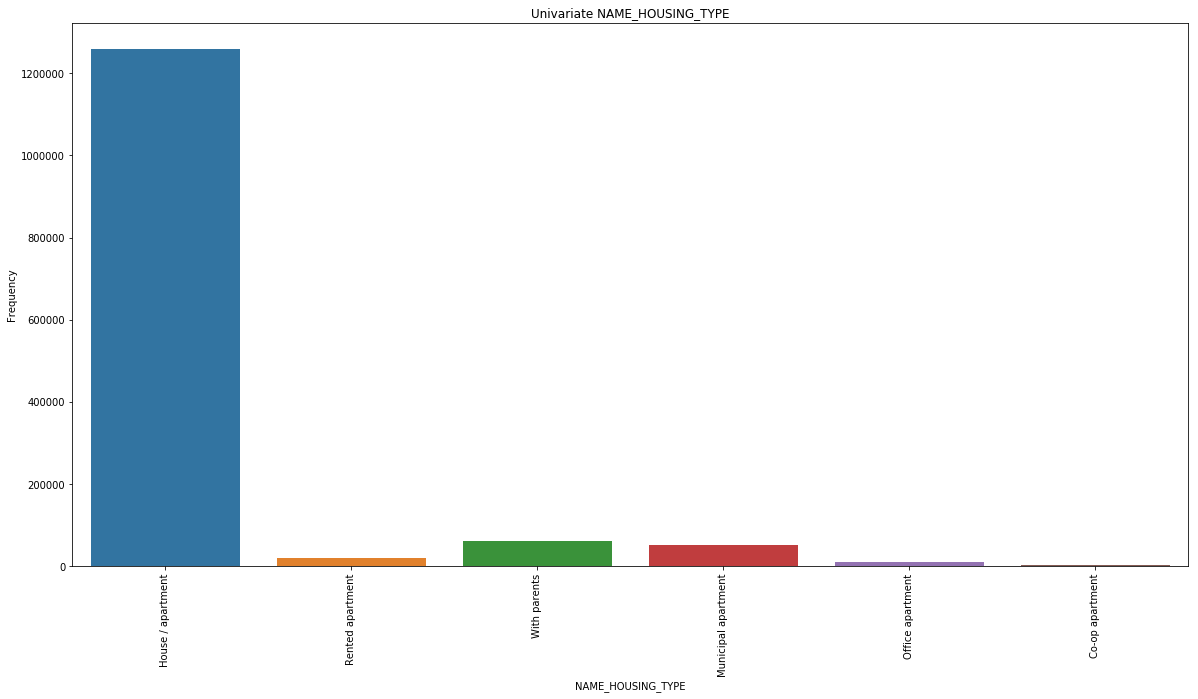

In [82]:
#Univariate analysis: NAME_HOUSING_TYPE
sns.countplot(x='NAME_HOUSING_TYPE', data=customer_data)
plt.title('Univariate NAME_HOUSING_TYPE')
plt.ylabel('Frequency')
plt.xlabel('NAME_HOUSING_TYPE')
plt.xticks(rotation = 90)
plt.show();

As observed, majority of the loan applicants own house while few others live with parents or municipal appartments

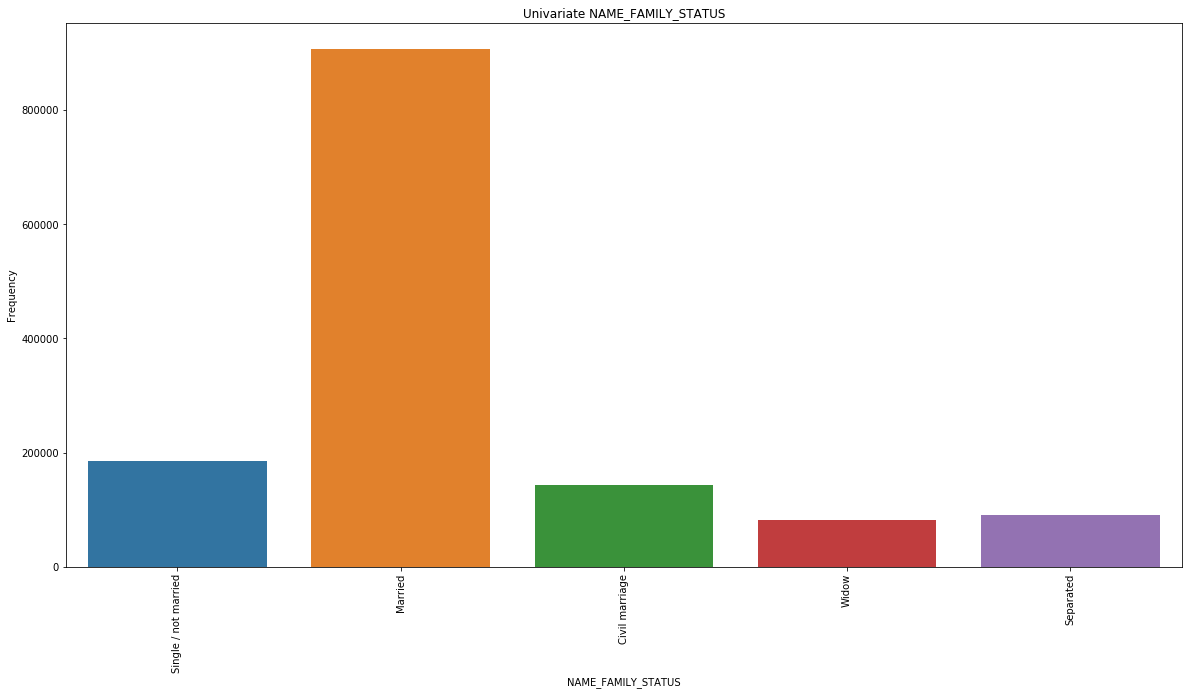

In [83]:
#Univariate analysis: NAME_FAMILY_STATUS
sns.countplot(x='NAME_FAMILY_STATUS', data=customer_data)
plt.title('Univariate NAME_FAMILY_STATUS')
plt.ylabel('Frequency')
plt.xlabel('NAME_FAMILY_STATUS')
plt.xticks(rotation = 90)
plt.show();

As observed, majority of the loan applicants are married.

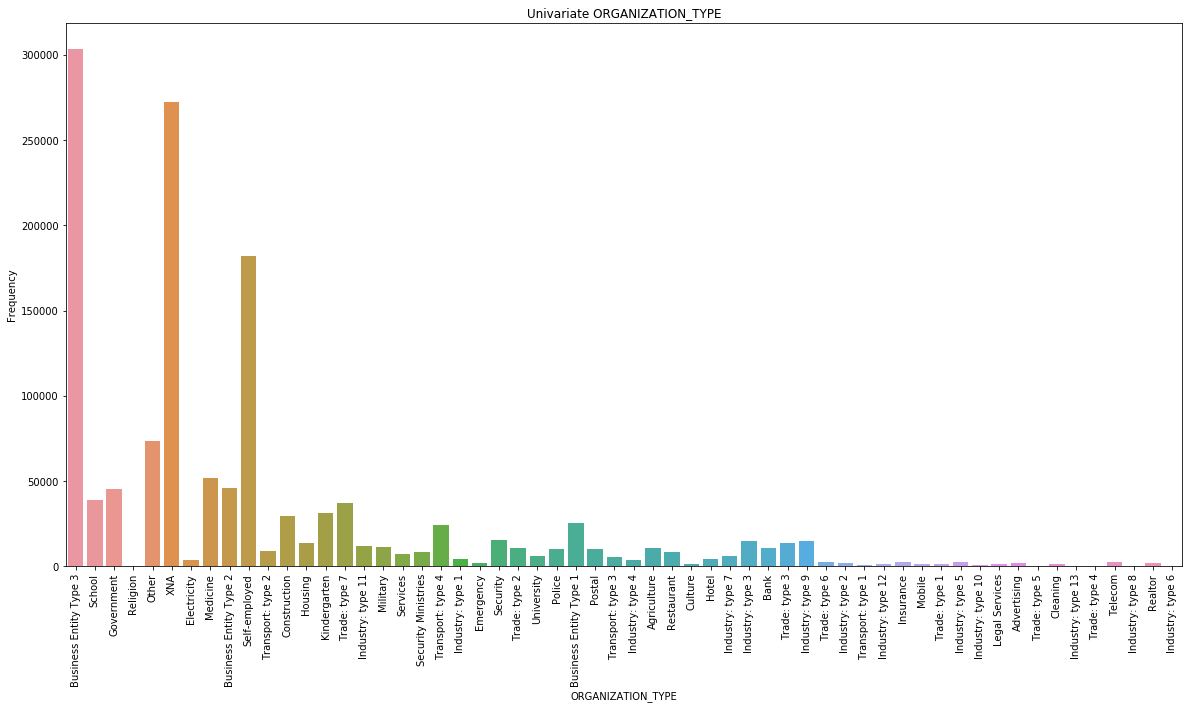

In [84]:
#Univariate analysis: ORGANIZATION_TYPE
sns.countplot(x='ORGANIZATION_TYPE', data=customer_data)
plt.title('Univariate ORGANIZATION_TYPE')
plt.ylabel('Frequency')
plt.xlabel('ORGANIZATION_TYPE')
plt.xticks(rotation = 90)
plt.show();

As observed, people from Business entity organizations and self employed are the major loan applicants while others being considerably less.

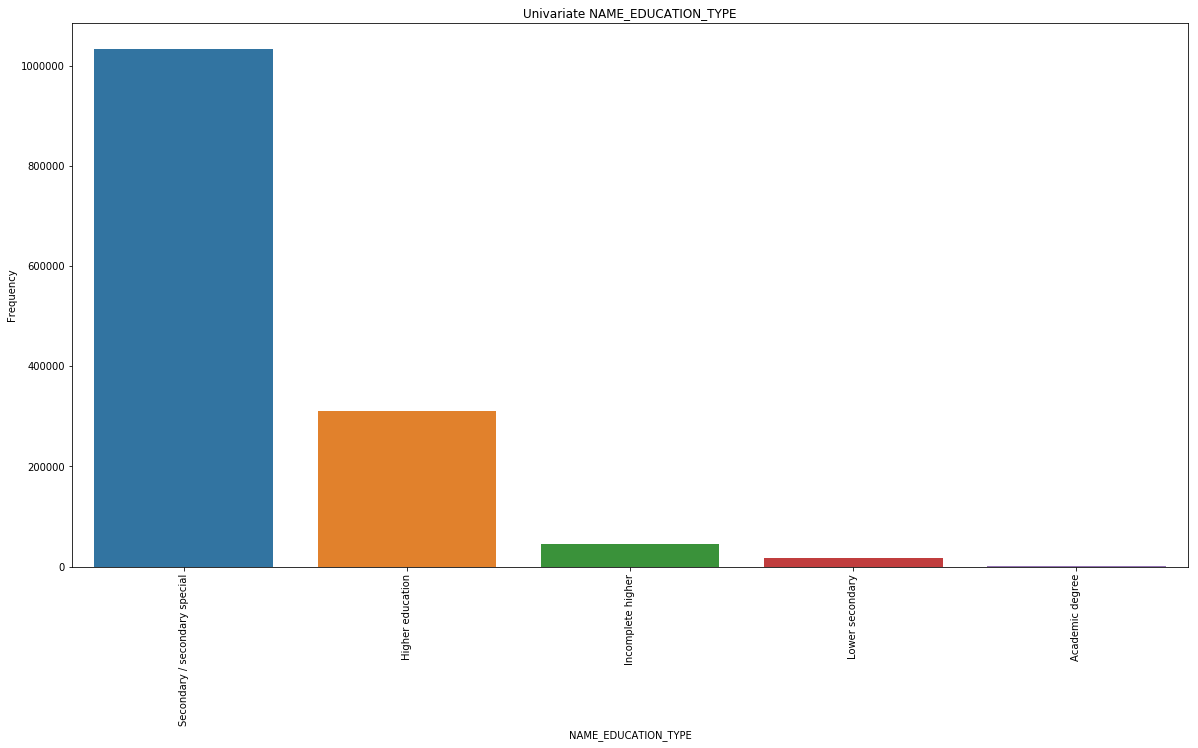

In [85]:
#Univariate analysis: NAME_EDUCATION_TYPE
sns.countplot(x='NAME_EDUCATION_TYPE', data=customer_data)
plt.title('Univariate NAME_EDUCATION_TYPE')
plt.ylabel('Frequency')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.xticks(rotation = 90)
plt.show();

As observed, there are more than 1000000 loan applicants with secondary/ secondary education and the least count is for academic degree

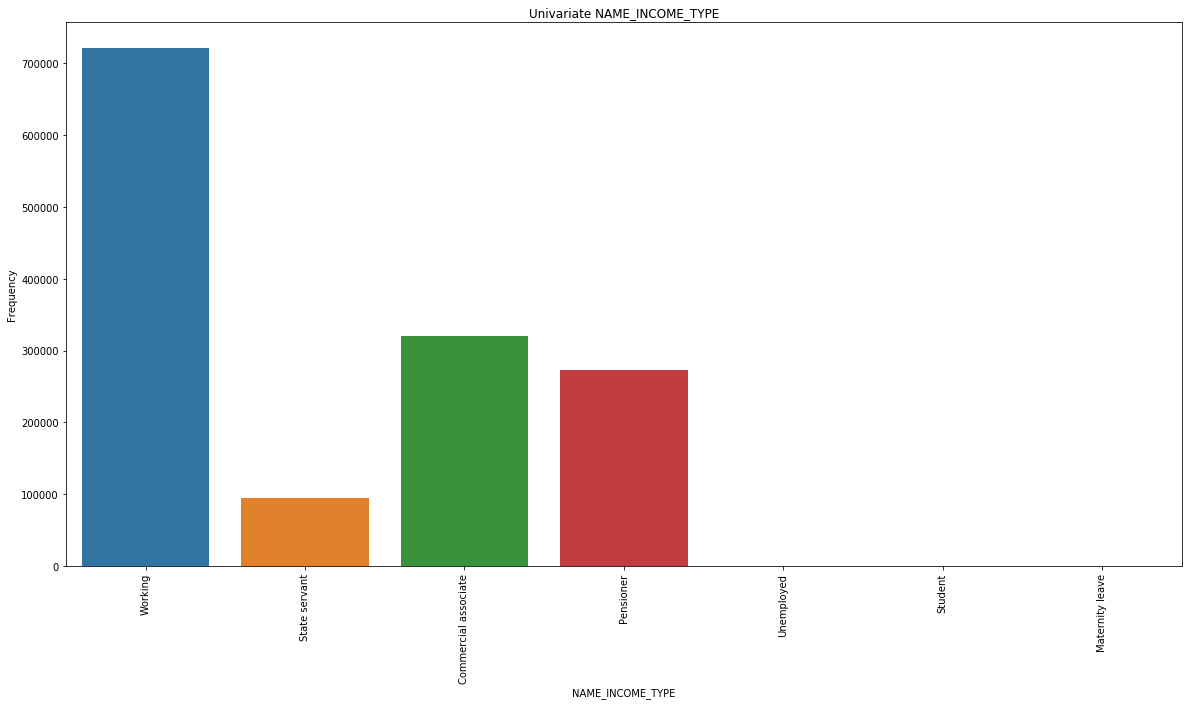

In [86]:
#Univariate analysis: NAME_INCOME_TYPE
sns.countplot(x='NAME_INCOME_TYPE', data=customer_data)
#sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=customer_data, estimator=np.median)
plt.title('Univariate NAME_INCOME_TYPE')
plt.ylabel('Frequency')
plt.xlabel('NAME_INCOME_TYPE')
plt.xticks(rotation = 90)
plt.show();

As observed, there are more than 700000 loan applicants who earn income from Working, less than 100000 applicants from State servants and even less from Unemployed people, students and people with maternity leave.   

Univariate analysis on continuous variables

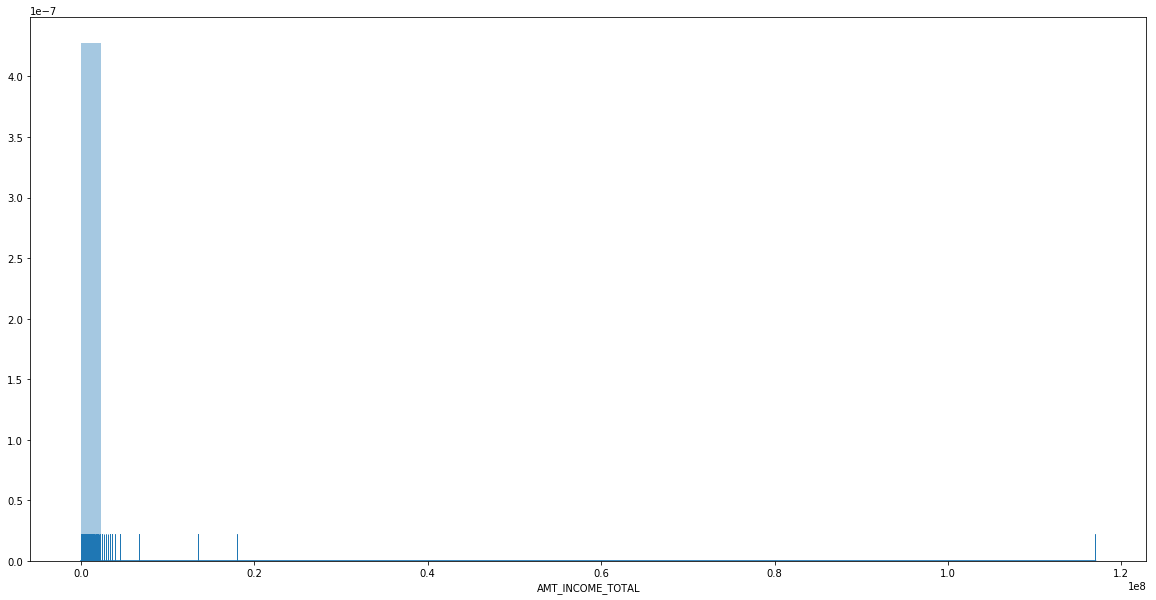

In [87]:
#Univariate analysis: AMT_INCOME_TOTAL
sns.distplot(customer_data['AMT_INCOME_TOTAL'],  rug=True)

As observed, people with lower income, are the major applicants for loan.

Bivariate analysis on categorical variables

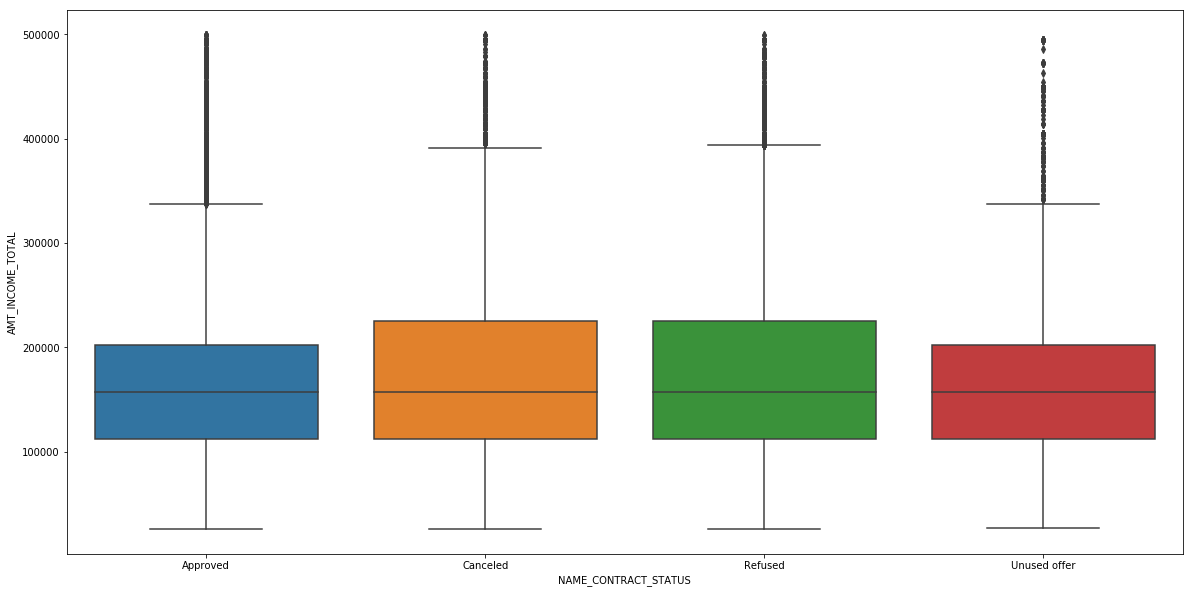

In [88]:
# remove points having extreme values
customer_datatemp = customer_data[(customer_data.AMT_INCOME_TOTAL < 500000)]
#Bivariate analysis: NAME_CONTRACT_STATUS vs AMT_CREDIT
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_INCOME_TOTAL', data=customer_datatemp)
#plt.yscale('log')
plt.show()

As observed the spread for income is almost same for all contract status. This implies that income does not affect whether the application will be approved or rejected.

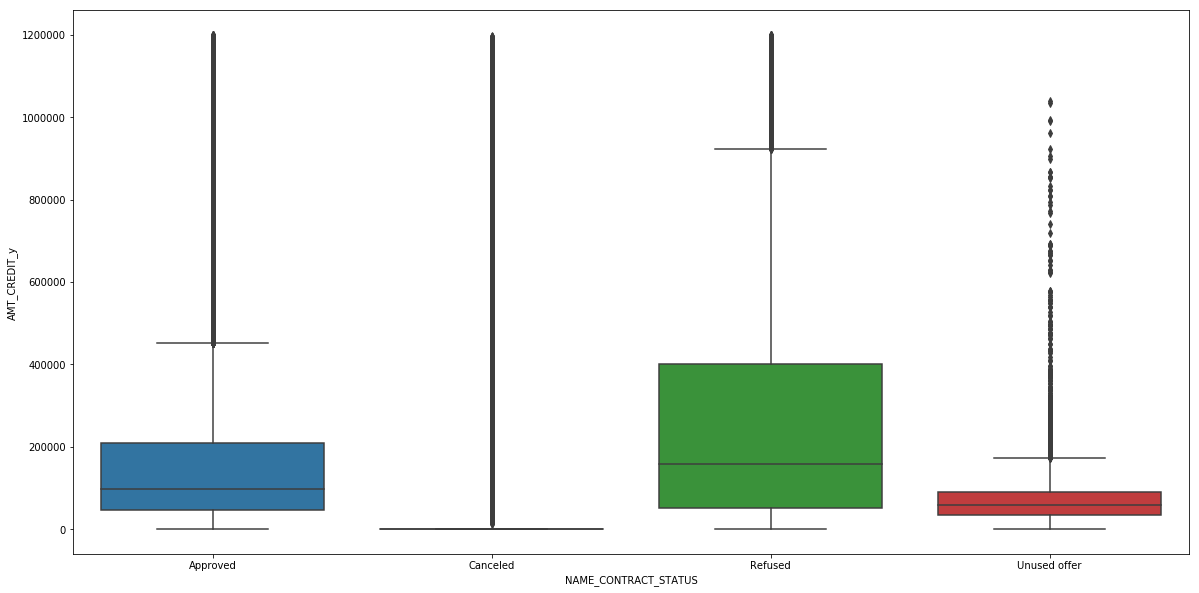

In [89]:
# remove points having extreme values
customer_datatemp = customer_data[(customer_data.AMT_CREDIT_y < 1200000)]
#Bivariate analysis: NAME_CONTRACT_STATUS vs AMT_CREDIT
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT_y', data=customer_datatemp)
#plt.yscale('log')
plt.show()

As observed, people with high credit amount has been rejected loans, whereas people with low credit amount has been approved loans.

Bivariate analysis on continuous variables

In [90]:
#consider only numeric columns for correlation
numerics = ['int64', 'float64']
currcustomer = customer_data.select_dtypes(include=numerics)
corcustomer = currcustomer.corr()
round(corcustomer, 2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,SK_ID_PREV,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
SK_ID_CURR,1.0,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
TARGET,-0.0,1.00,0.02,-0.00,-0.02,-0.01,-0.03,-0.04,-0.08,-0.05,...,0.01,0.03,-0.06,0.00,-0.01,-0.00,-0.03,-0.00,-0.04,-0.00
CNT_CHILDREN,-0.0,0.02,1.00,0.01,0.00,0.03,-0.00,-0.02,-0.37,-0.25,...,0.02,-0.00,-0.01,-0.00,-0.03,-0.03,0.02,0.00,0.01,0.00
AMT_INCOME_TOTAL,0.0,-0.00,0.01,1.00,0.17,0.21,0.17,0.08,-0.03,-0.07,...,-0.01,-0.01,0.03,0.00,0.07,0.07,0.04,-0.00,-0.00,0.00
AMT_CREDIT_x,-0.0,-0.02,0.00,0.17,1.00,0.76,0.99,0.09,0.05,-0.06,...,0.01,-0.02,0.09,-0.00,0.12,0.12,0.05,0.00,0.06,0.00
AMT_ANNUITY,-0.0,-0.01,0.03,0.21,0.76,1.00,0.76,0.10,-0.03,-0.11,...,-0.01,-0.02,0.06,0.00,0.11,0.11,0.06,0.00,0.03,0.00
AMT_GOODS_PRICE,-0.0,-0.03,-0.00,0.17,0.99,0.76,1.00,0.09,0.05,-0.06,...,0.01,-0.02,0.09,-0.00,0.12,0.12,0.05,0.00,0.06,0.00
REGION_POPULATION_RELATIVE,0.0,-0.04,-0.02,0.08,0.09,0.10,0.09,1.00,0.04,0.00,...,-0.01,0.00,0.05,0.00,0.04,0.05,0.15,-0.00,0.03,0.00
DAYS_BIRTH,0.0,-0.08,-0.37,-0.03,0.05,-0.03,0.05,0.04,1.00,0.63,...,-0.01,-0.00,0.09,0.00,0.08,0.08,-0.12,-0.00,0.03,-0.01
DAYS_EMPLOYED,0.0,-0.05,-0.25,-0.07,-0.06,-0.11,-0.06,0.00,0.63,1.00,...,0.00,0.01,-0.01,0.00,0.01,0.01,-0.11,0.00,-0.01,-0.00


In [91]:
c1customer = corcustomer.unstack()
c2customer=c1customer[c1customer<1.00]
print(c2customer.sort_values(ascending = True))
#Top 10 correlation

REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.516598
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.516598
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.515748
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.515748
DAYS_BIRTH                   CNT_CHILDREN                  -0.365348
CNT_CHILDREN                 DAYS_BIRTH                    -0.365348
CNT_FAM_MEMBERS              DAYS_BIRTH                    -0.326207
DAYS_BIRTH                   CNT_FAM_MEMBERS               -0.326207
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START_y     -0.283170
HOUR_APPR_PROCESS_START_y    REGION_RATING_CLIENT          -0.283170
EXT_SOURCE_2                 REGION_RATING_CLIENT          -0.281980
REGION_RATING_CLIENT         EXT_SOURCE_2                  -0.281980
HOUR_APPR_PROCESS_START_x    REGION_RATING_CLIENT          -0.280130
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START_x     -0.280130
REGION_RATING_CLIENT_W_CITY  EXT_S

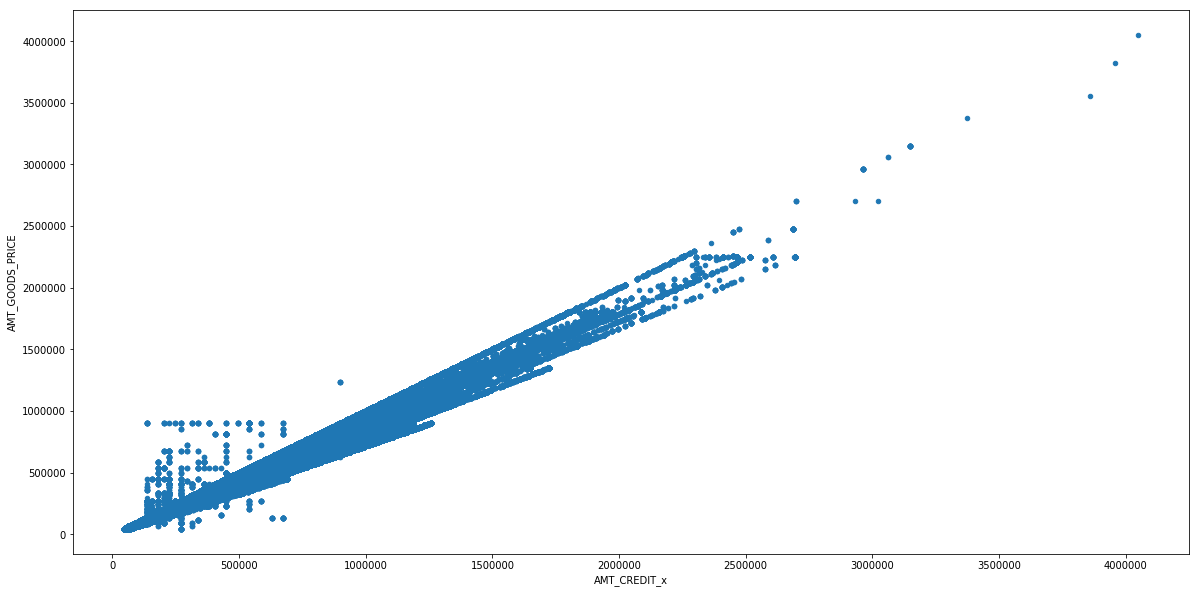

In [92]:
#Bivariate analysis: AMT_CREDIT_x vs OBS_60_CNT_SOCIAL_CIRCLE
customer_data.plot.scatter(x='AMT_CREDIT_x',y='AMT_GOODS_PRICE')

As observed, the graph is a straight line as AMT_CREDIT_x and AMT_GOODS_PRICE are highly correlated

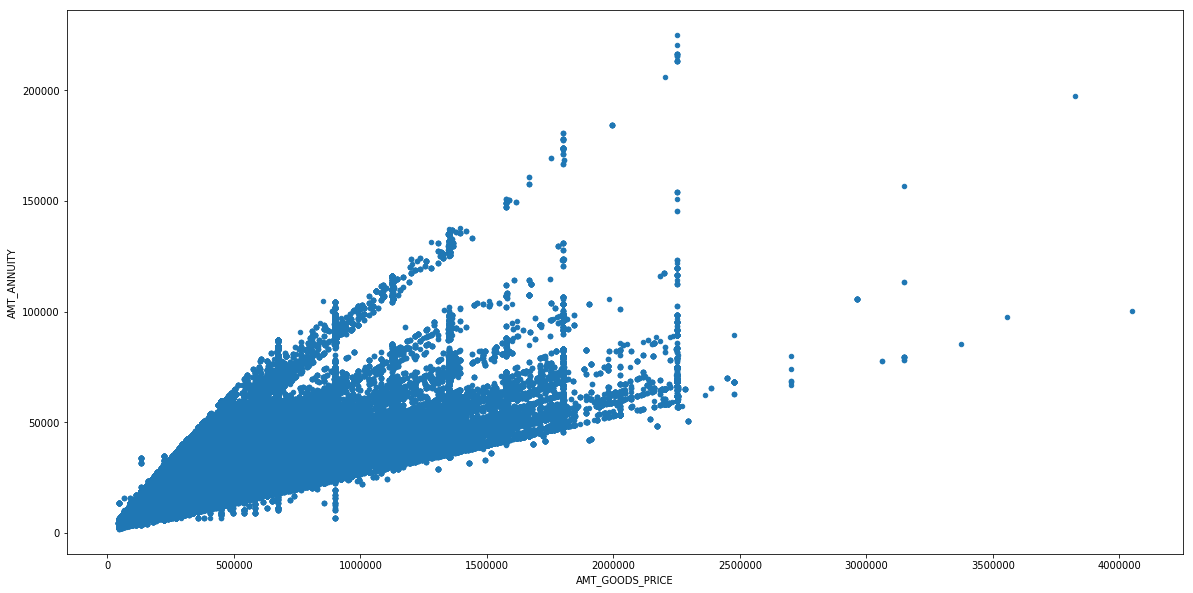

In [93]:
#Bivariate analysis: AMT_GOODS_PRICE vs AMT_ANNUITY
customer_data.plot.scatter(x='AMT_GOODS_PRICE',y='AMT_ANNUITY')

As observed, the graph shows some correlation between AMT_GOODS_PRICE and AMT_ANNUITY. Since the correlation is not very high the graph is not exactly a straight line

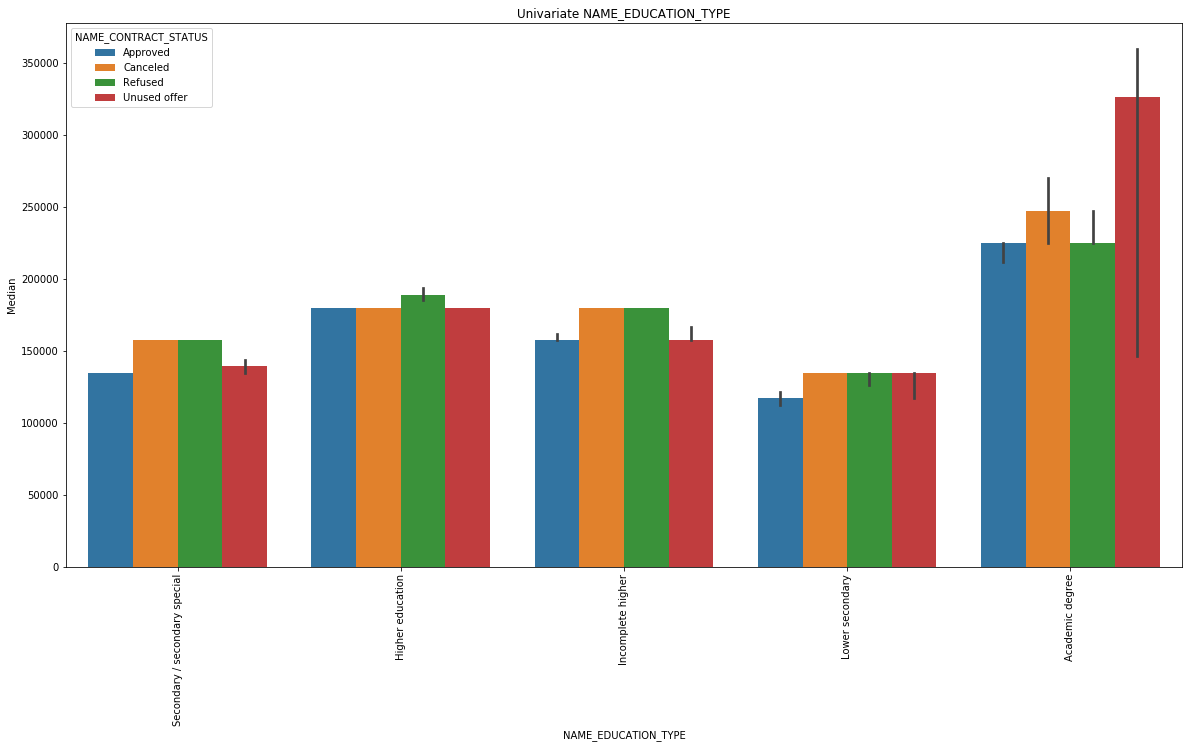

In [94]:
#visualise the distribution across two categorical variables
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_CONTRACT_STATUS', 
            data=customer_data, estimator=np.median)
plt.title('Univariate NAME_EDUCATION_TYPE')
plt.ylabel('Median')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.xticks(rotation = 90)
plt.show();

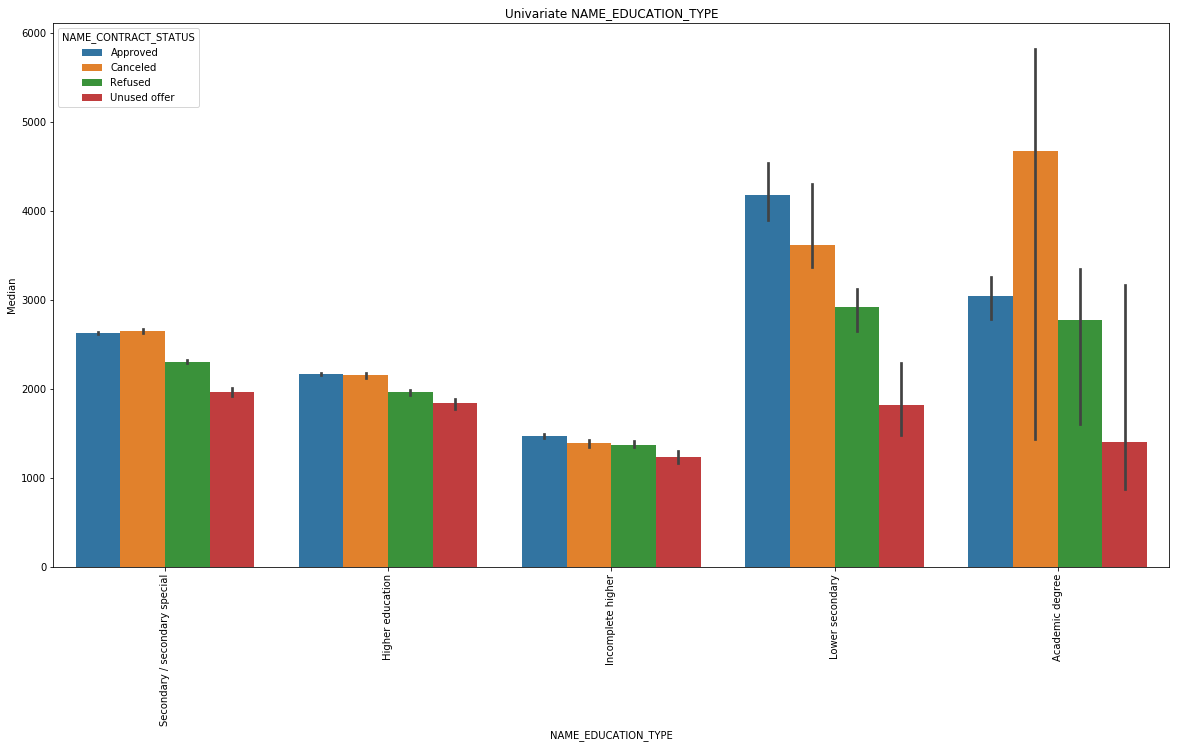

In [95]:
#visualise the distribution across two categorical variables
sns.barplot(x='NAME_EDUCATION_TYPE', y='DAYS_EMPLOYED', hue='NAME_CONTRACT_STATUS', 
            data=customer_data, estimator=np.median)
plt.title('Univariate NAME_EDUCATION_TYPE')
plt.ylabel('Median')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.xticks(rotation = 90)
plt.show();

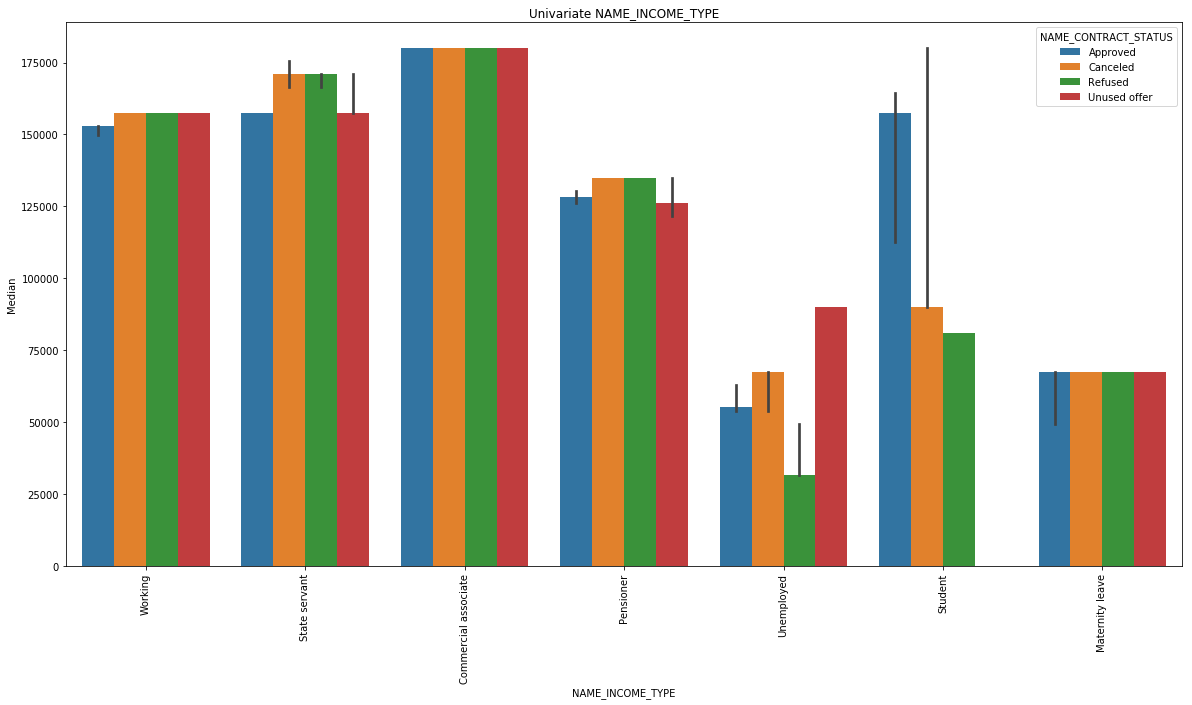

In [96]:
#visualise the distribution across two categorical variables
sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_CONTRACT_STATUS', 
            data=customer_data, estimator=np.median)
plt.title('Univariate NAME_INCOME_TYPE')
plt.ylabel('Median')
plt.xlabel('NAME_INCOME_TYPE')
plt.xticks(rotation = 90)
plt.show();

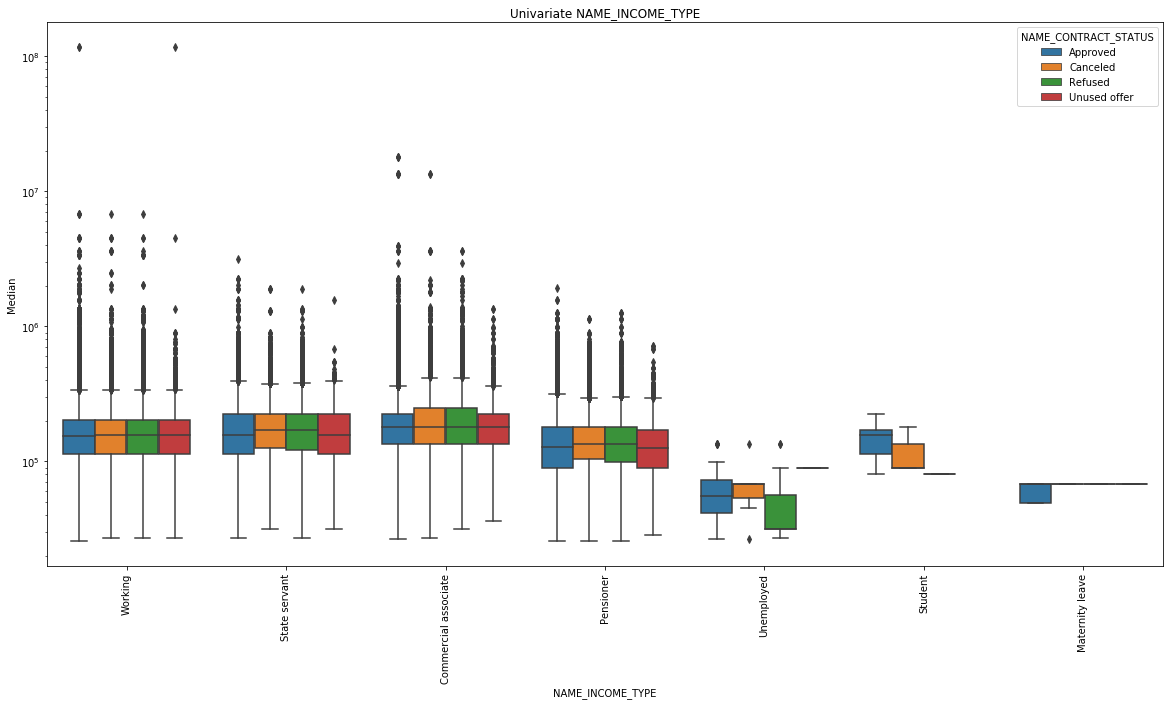

In [97]:
#visualise the distribution across two categorical variables
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_CONTRACT_STATUS', 
            data=customer_data)
plt.title('Univariate NAME_INCOME_TYPE')
plt.ylabel('Median')
plt.xlabel('NAME_INCOME_TYPE')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show();

Most of the loan applicants are married and have dependents on them.
Also most of the applicants own house and are from the working group and most of them have atleast completed secondary/special secondary education.
People belonging to business organization's are the ones who usually apply for huge amount of loan.
Majority of the applicants have lower income.
Most of the loans with high credit amount has been rejected whereas those with low credit amount has been approved.
Although it cannot be clearly inferred as to whom should we give loan, through this case study we have found out the driver factors. Factors like income type, income amount, loan application amount, working organization, are some factors which decides the frequency of applicants.